# **Online Shoppers Purchasing Intention**

**Name:** ***Albin James***

**Organization:** *Entri Elevate*



1. **Overview of Problem Statement**: The primary objective of this project is to analyze the Online Shoppers' Intention dataset to understand the factors influencing online shopping behaviors and predict whether a visitor will make a purchase, thereby generating revenue. This dataset encompasses various features that capture user interactions on an e-commerce platform, such as the number of page views, time spent on different types of pages, and visitor characteristics. By leveraging these insights, the project aims to enhance marketing strategies and improve user experience on online shopping platforms.











2.   **Objective**: The objective of this project is to analyze the Online Shoppers' Intention dataset to identify key factors that influence online shopping behaviors and to predict the likelihood of revenue generation from visitor interactions on an e-commerce platform.







3.   **Data Description**:
**- Source**: The dataset can be downloaded from the link : https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset

**- Features:**


*   Administrative: Number of administrative pages viewed by the visitor.
*   Administrative_Duration: Total time (in seconds) spent on administrative pages.

*   Informational: Number of informational pages viewed.
*   Informational_Duration: Total time (in seconds) spent on informational pages.





*   ProductRelated: Number of product-related pages viewed during the session

*  ProductRelated_Duration: Total time (in seconds) spent on product-related pages.

*   BounceRates: The percentage of visitors who leave the site after viewing only one page.
*   ExitRates: The percentage of visitors who exit from a specific page.


*   PageValues: Average value of a page based on conversion rates, indicating its contribution to revenue generation.


*  SpecialDay: A binary indicator that specifies if the visit occurred on a special day (e.g., holiday).


*   Month: The month during which the visit occurred, represented as a categorical variable.
* OperatingSystems: The type of operating system used by the visitor (e.g., Windows, macOS).


*   Browser: The web browser used by the visitor (e.g., Chrome, Firefox)
*   Region: Geographic region from which the visitor accessed the site.


*   TrafficType: Type of traffic source (e.g., direct, referral).
*   VisitorType: Indicates whether the visitor is a new or returning user


*   Weekend: A binary indicator that denotes if the visit occurred on a weekend.
*   Revenue: A binary outcome variable indicating whether the visit resulted in revenue generation (1 for yes, 0 for no).


















4.  **Data Collection:**




In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving online_shoppers_intention.csv to online_shoppers_intention.csv


In [ ]:
# Loading Libraries
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.special import boxcox1p
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import PowerTransformer
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

In [ ]:
# Reading the dataset
data=pd.read_csv("online_shoppers_intention.csv")
data.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

Total Entries: The dataset contains 12330 entries, indicating a robust sample size for analysis.

Column Count: There are 18 columns in total, each representing different features related to online shopping behavior.

Data Types: The features include a mix of data types:

*  Numerical: Columns such as Administrative, Administrative_Duration, ProductRelated, and BounceRates are numerical, which can be used for quantitative analysis.


*  Categorical: Features like Month, OperatingSystems, Browser, and VisitorType are categorical, suitable for classification tasks.


*   Boolean: The Revenue and Weekend columns are binary indicators, useful for binary classification models.



*   Missing Values: There are no missing values in this dataset.





In [ ]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


The comparison of mean and median values reveals significant disparities in user engagement patterns on the e-commerce platform. The presence of outliers in various features indicates that while most users exhibit typical behavior, a small number of highly engaged users can significantly influence overall metrics.



5.   **Data Preprocessing - Data Cleaning:**




In [ ]:
data.isnull().sum()/len(data)*100

,0
Administrative,0.0
Administrative_Duration,0.0
Informational,0.0
Informational_Duration,0.0
ProductRelated,0.0
ProductRelated_Duration,0.0
BounceRates,0.0
ExitRates,0.0
PageValues,0.0
SpecialDay,0.0


**There are no missing values in this dataset**

In [ ]:
data.duplicated().sum()

125

In [ ]:
data.drop_duplicates(inplace=True)
data.shape

(12205, 18)

In [ ]:
num_data = data.select_dtypes(include="number")
num_data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,1,1,1,1
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,2,2,1,2
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,4,1,9,3
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,3,2,2,4
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,3,3,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,4,6,1,1
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,3,2,1,8
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,3,2,1,13
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,2,2,3,11


In [ ]:
num_data = data.select_dtypes(include='number')
numeric_columns=list(num_data)
numeric_columns

['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'SpecialDay',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType']

In [ ]:
num_data.skew()

,0
Administrative,1.947123
Administrative_Duration,5.592152
Informational,4.014173
Informational_Duration,7.540291
ProductRelated,4.333419
ProductRelated_Duration,7.253161
BounceRates,3.162425
ExitRates,2.234645
PageValues,6.350983
SpecialDay,3.285902


The skewness output from the numerical features in the Online Shoppers Purchasing' Intention dataset reveals significant insights into the distribution of various user interaction metrics. Most features exhibit positive skewness, indicating that while a majority of users display typical behavior (e.g., viewing fewer pages or spending less time), there are notable outliers who engage far more intensively. For instance, the Administrative_Duration and ProductRelated_Duration features show high skewness values of 5.59 and 7.25, respectively, suggesting that most visitors spend minimal time on administrative and product-related pages, while a small number spend an extraordinarily long time. Similarly, features like PageValues (skewness of 6.35) indicate that while many pages have low or no value, a few pages significantly contribute to revenue. This skewness highlights the need for targeted strategies to engage both typical users and high-engagement outliers effectively, as understanding these patterns can guide marketing efforts and improve overall conversion rates on the platform.

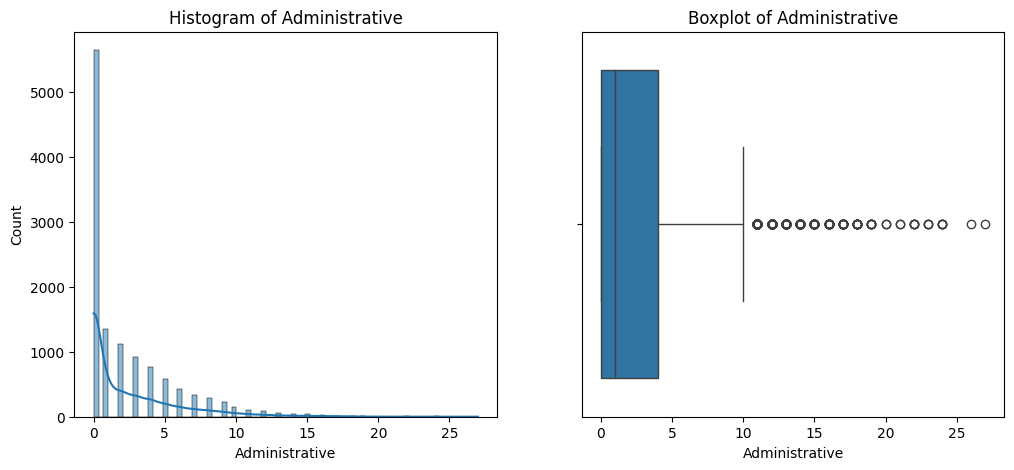

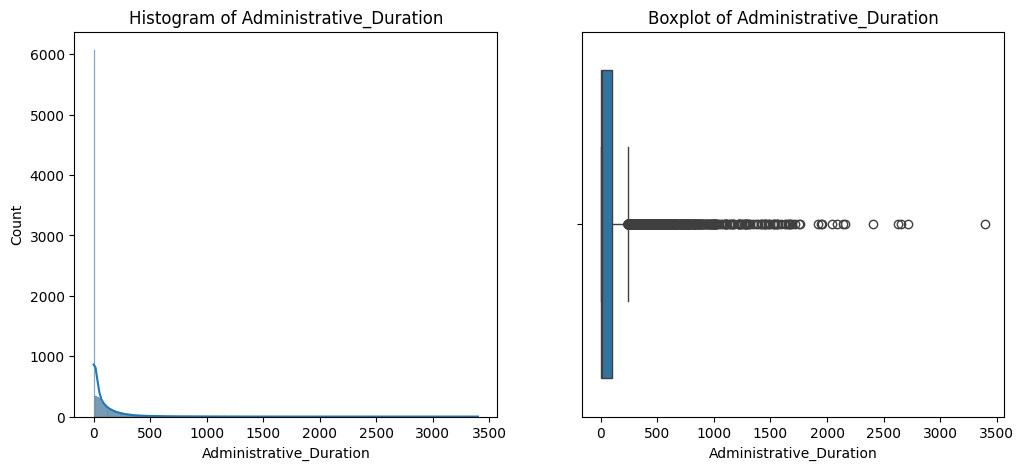

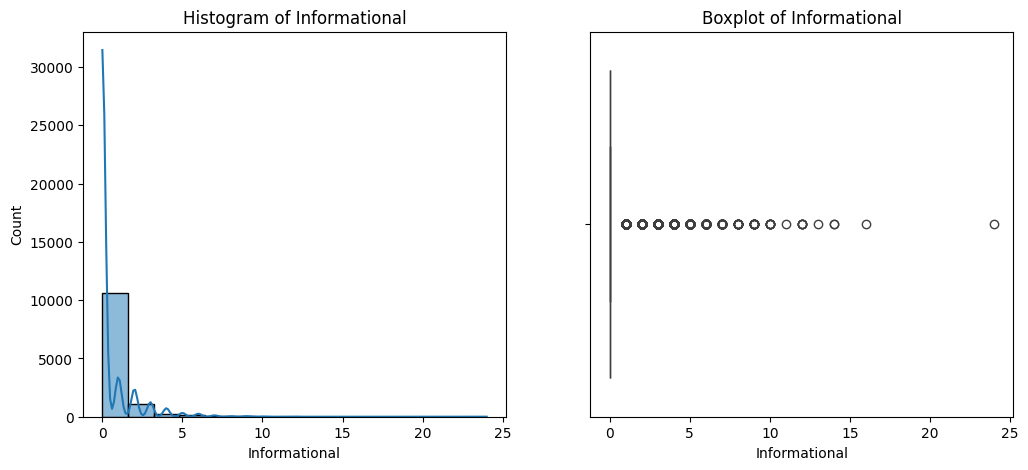

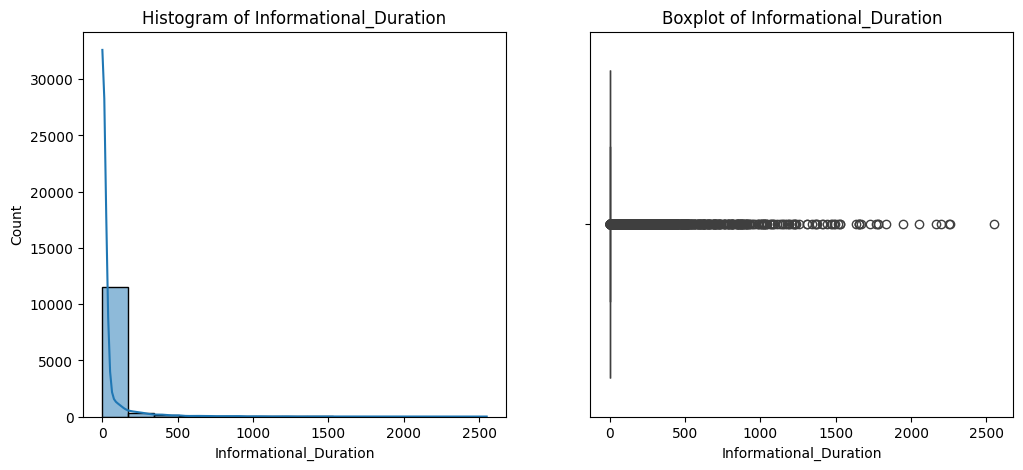

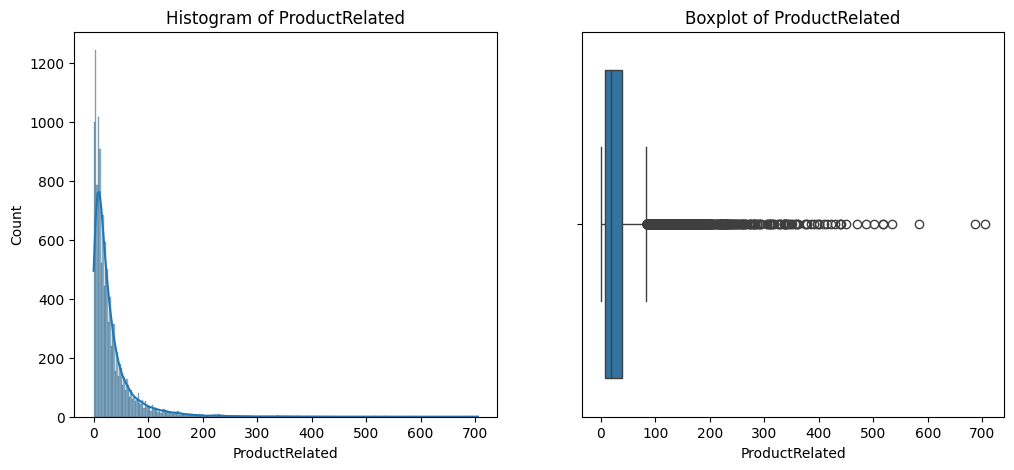

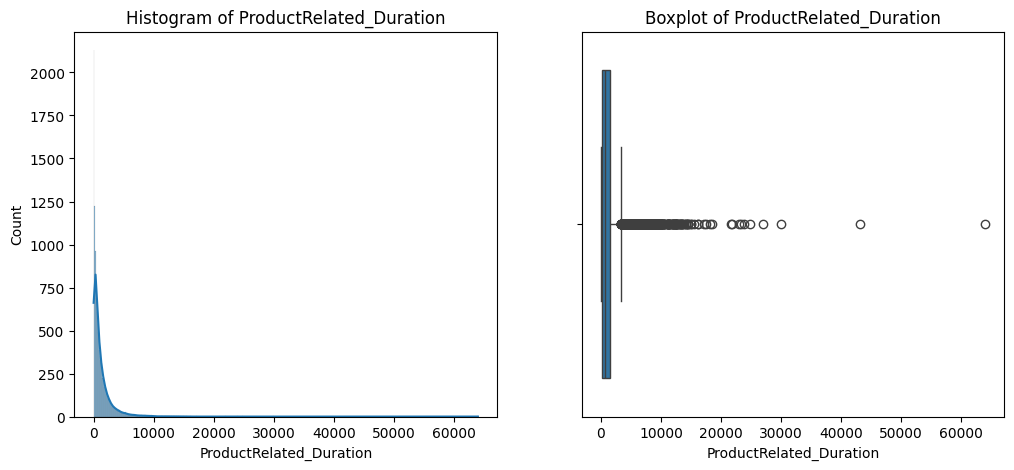

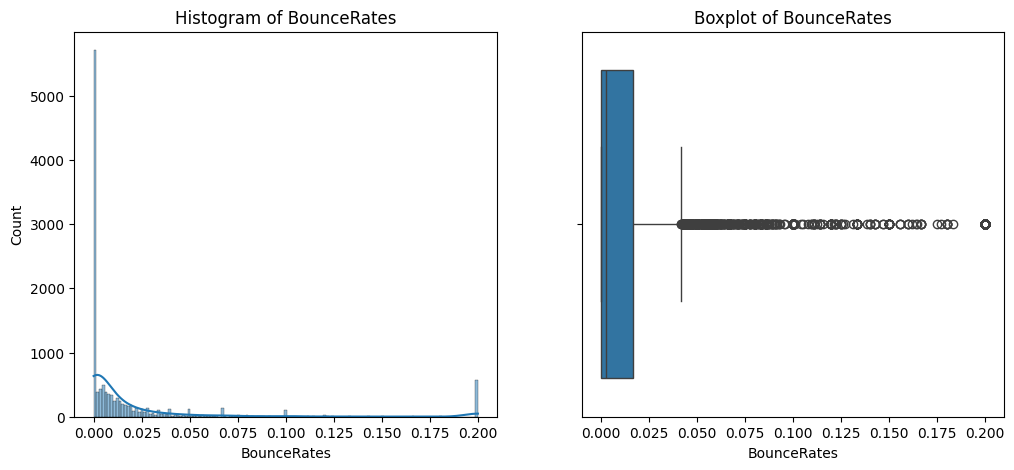

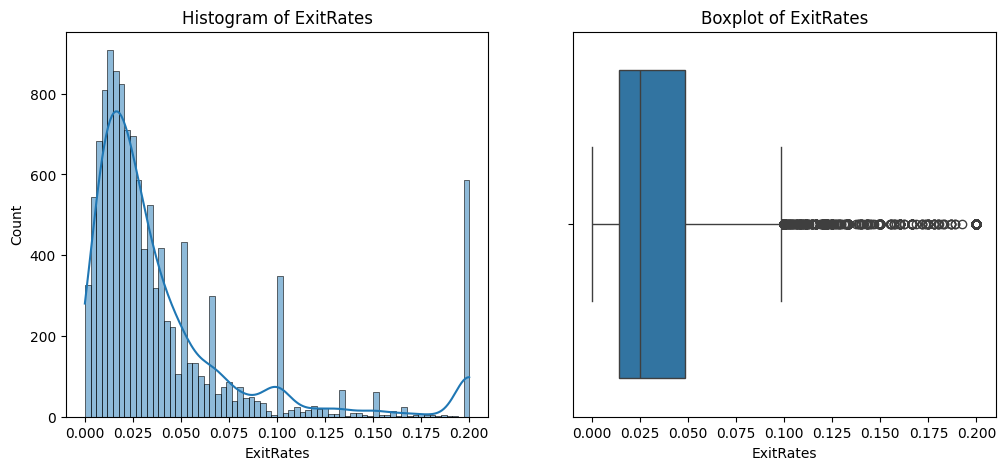

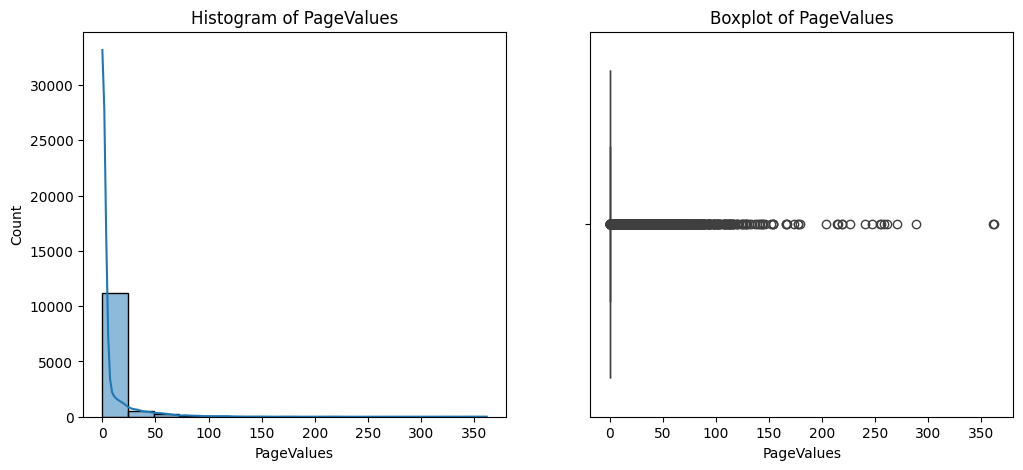

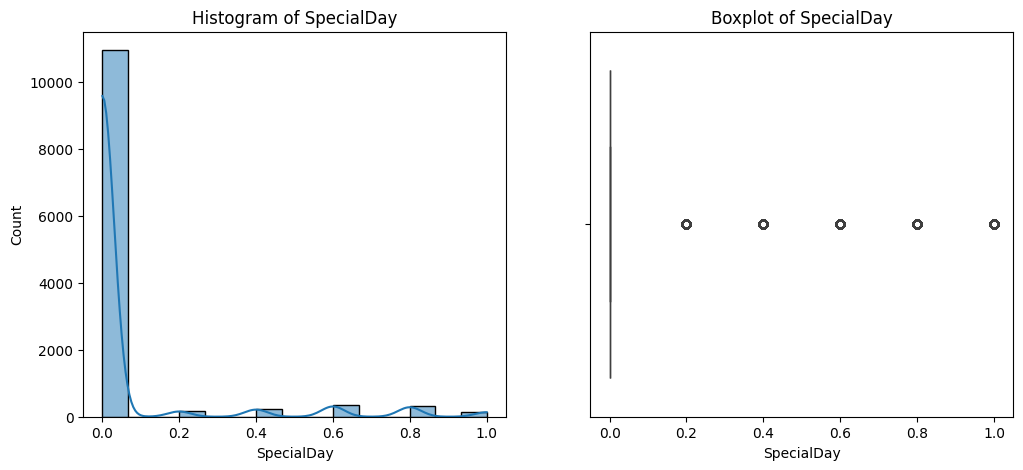

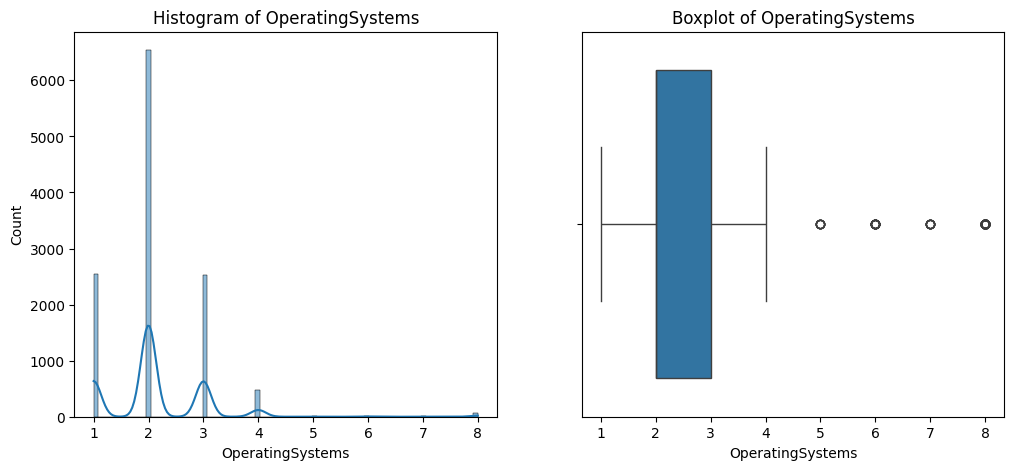

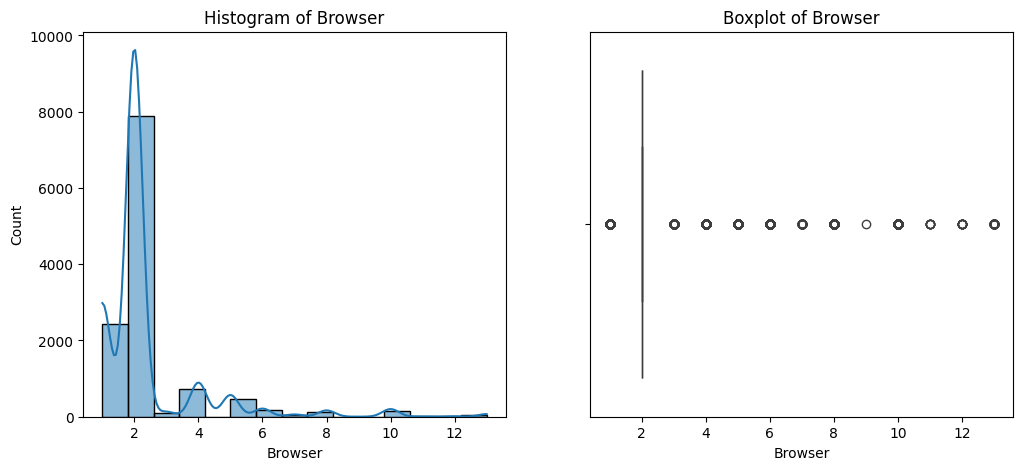

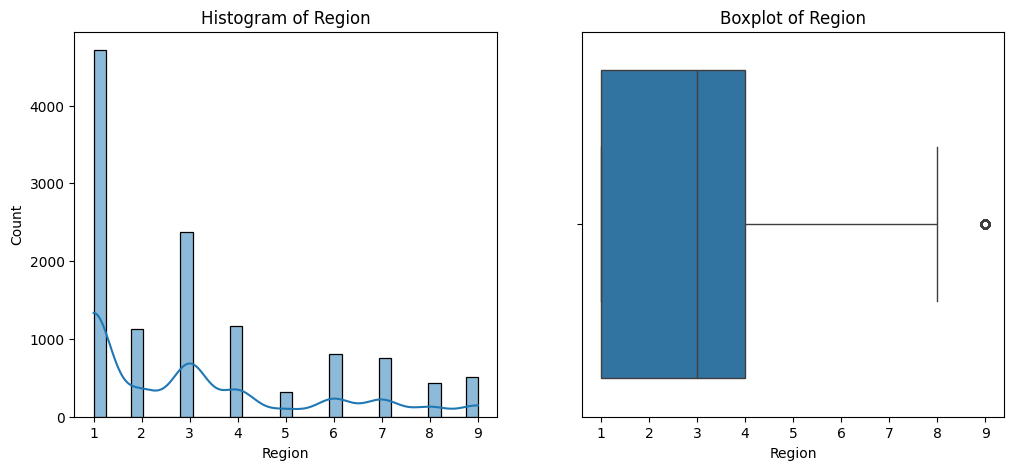

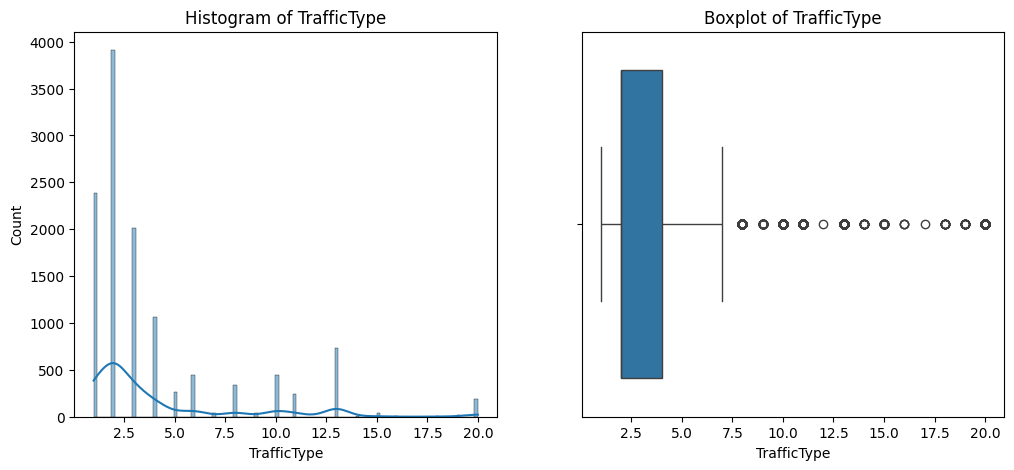

In [ ]:
for column in numeric_columns:
    plt.figure(figsize=(12, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[column], kde=True)
    plt.title(f'Histogram of {column}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')

All numerical features in this dataset containg outliers and are positively skewed.

In [ ]:
# Remove outliers using Z-score method
data = data[(np.abs(stats.zscore(data.select_dtypes(include=['float64', 'int64']))) < 3).all(axis=1)]

In [ ]:
data.shape

(9566, 18)

Since IQR method reduced the number of rows extremely, Z-score method is chosen.

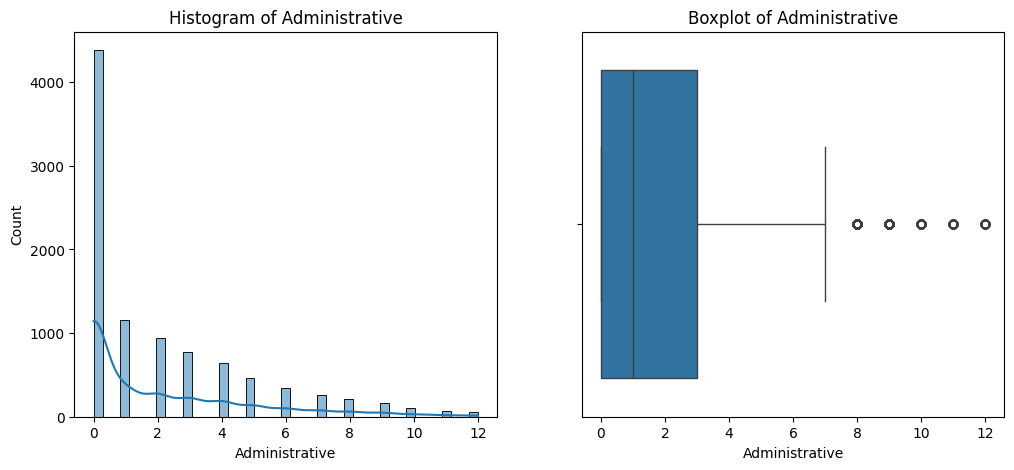

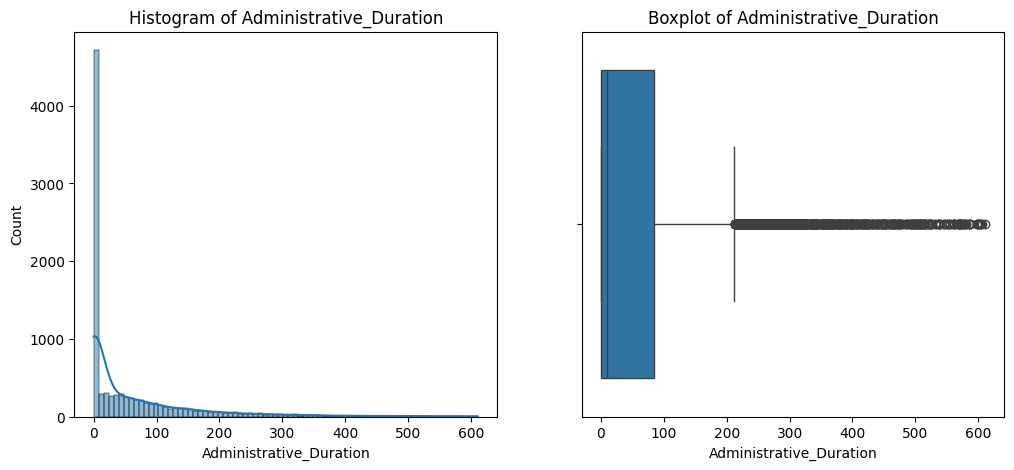

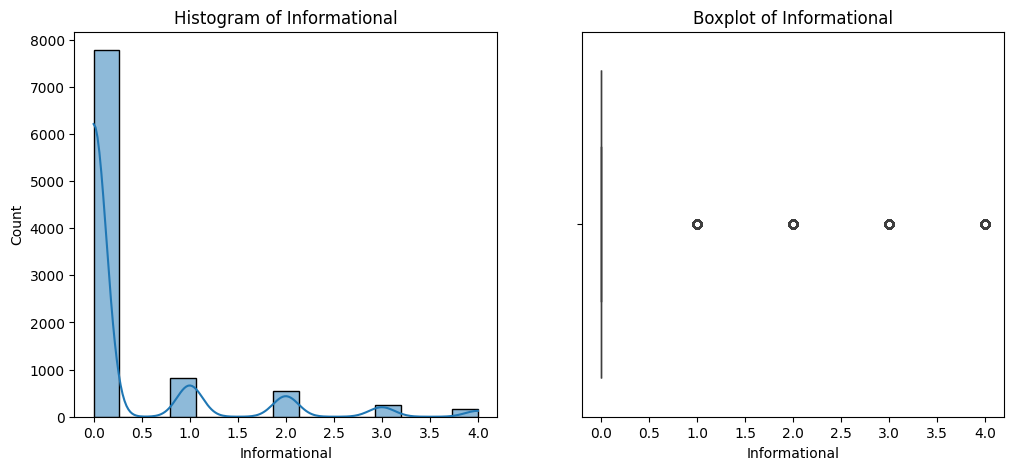

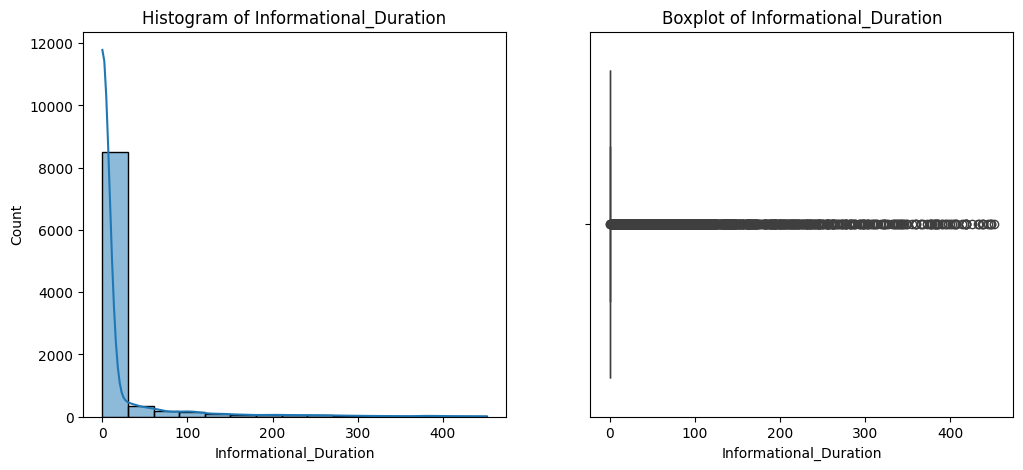

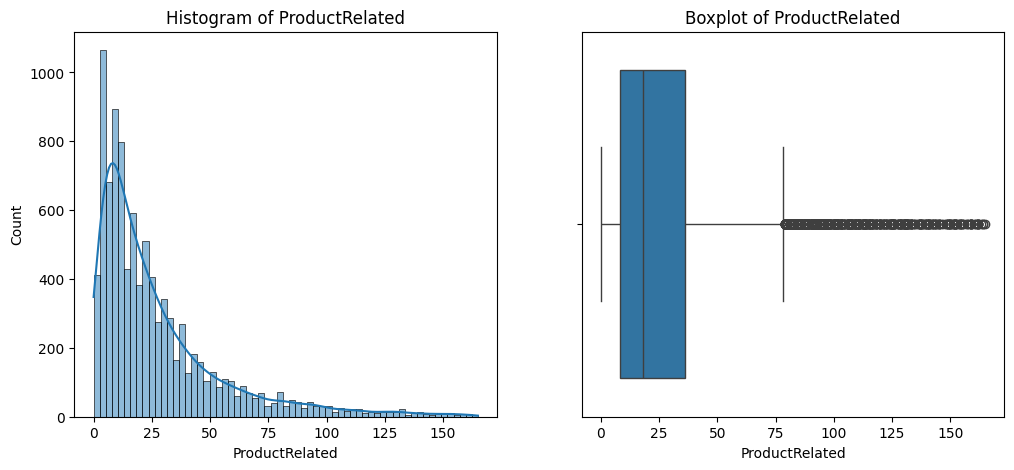

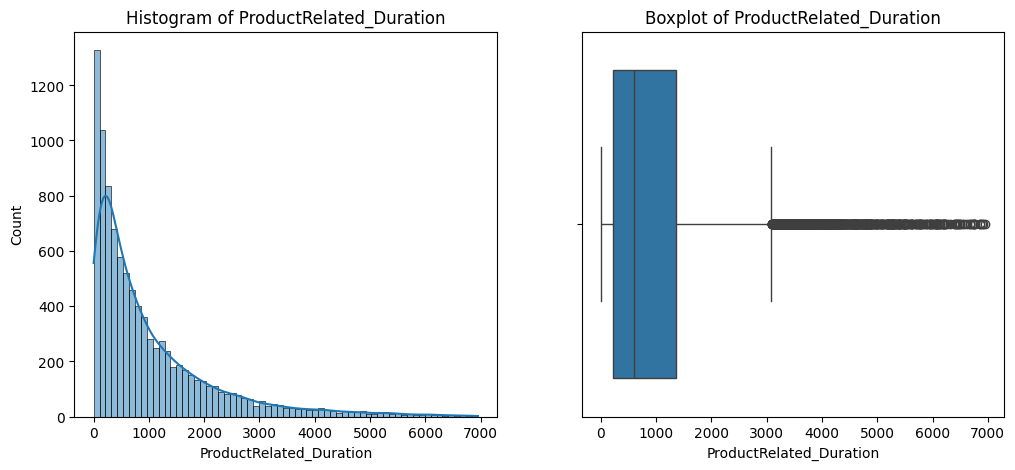

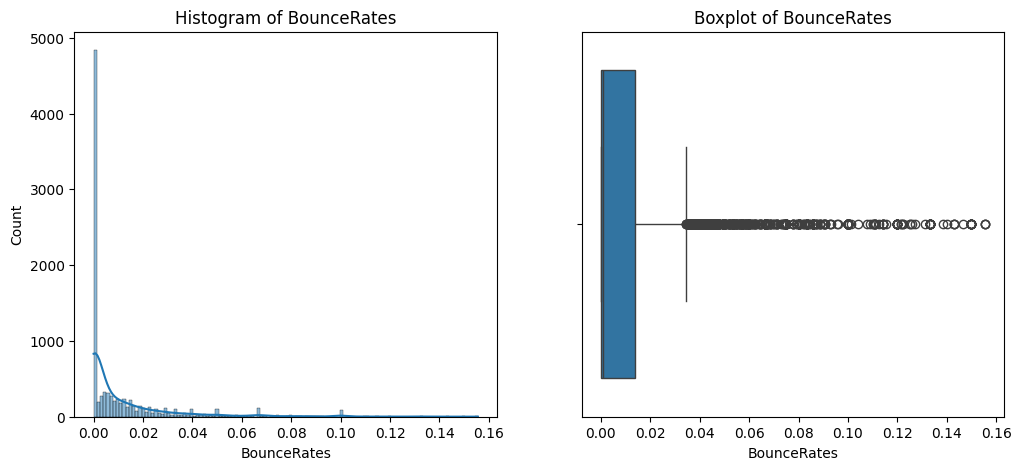

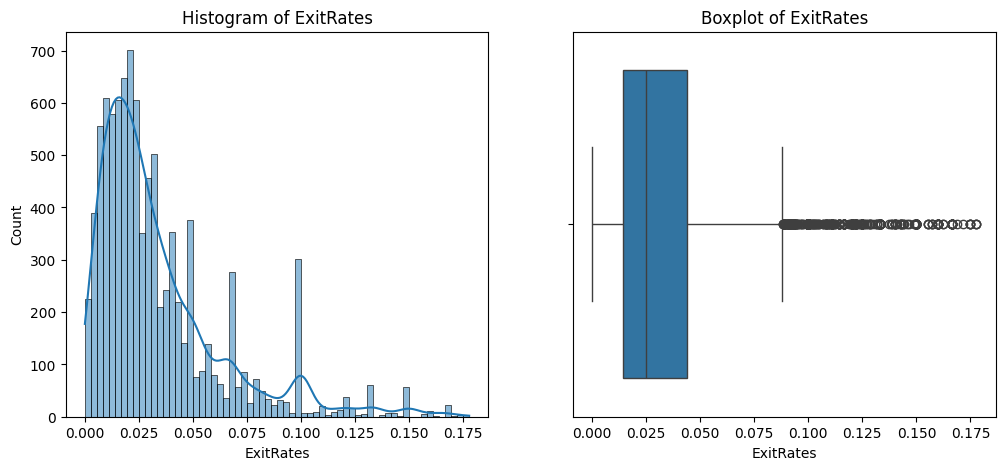

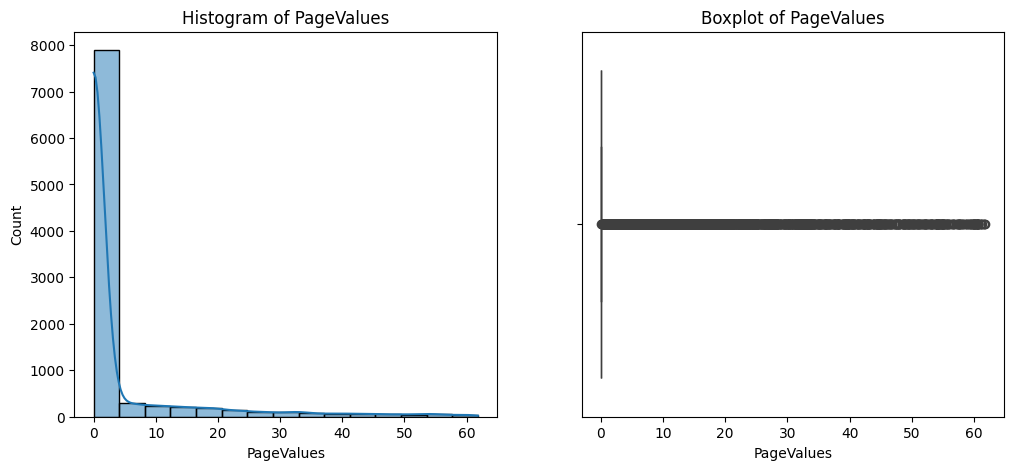

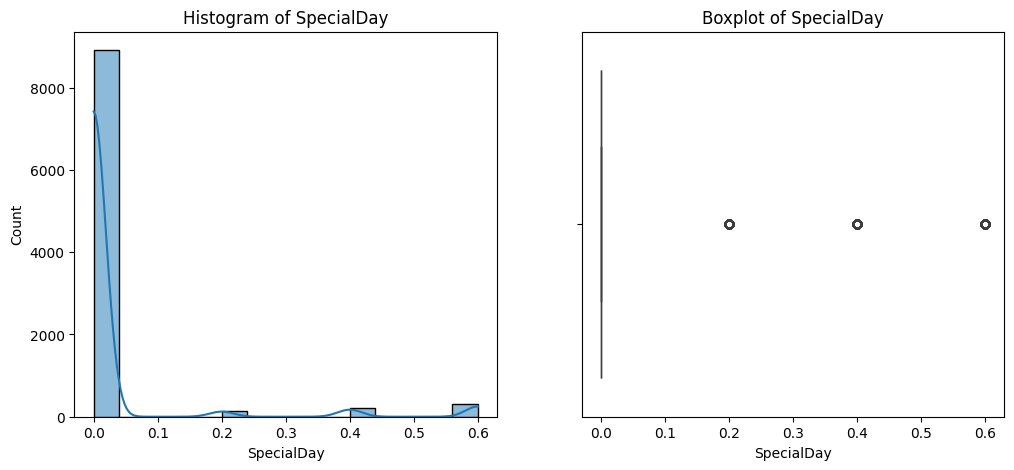

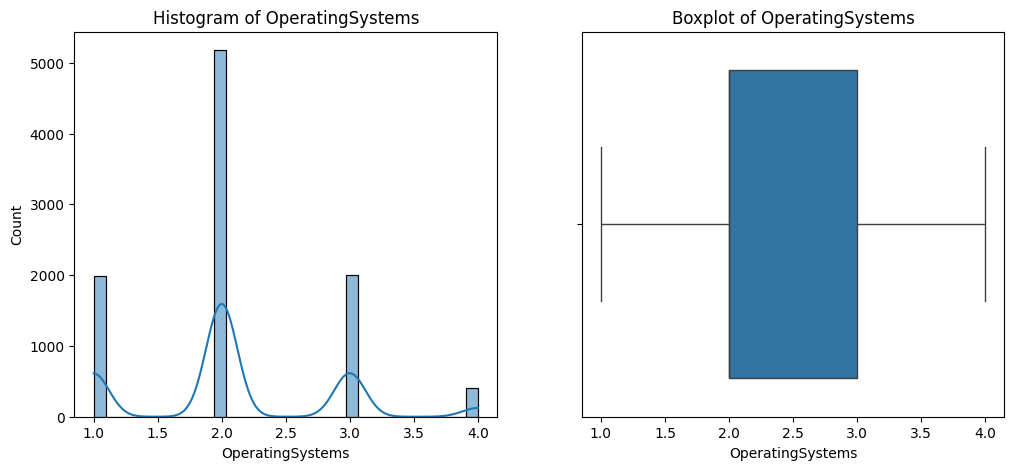

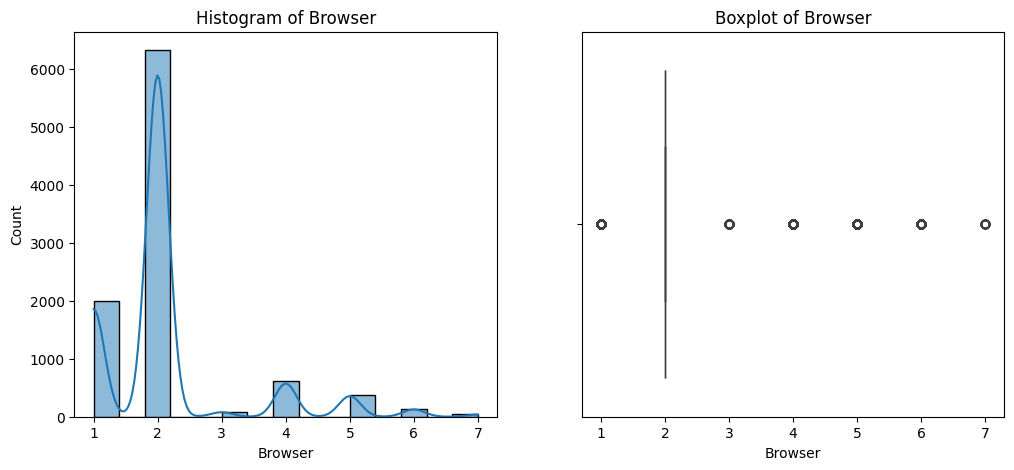

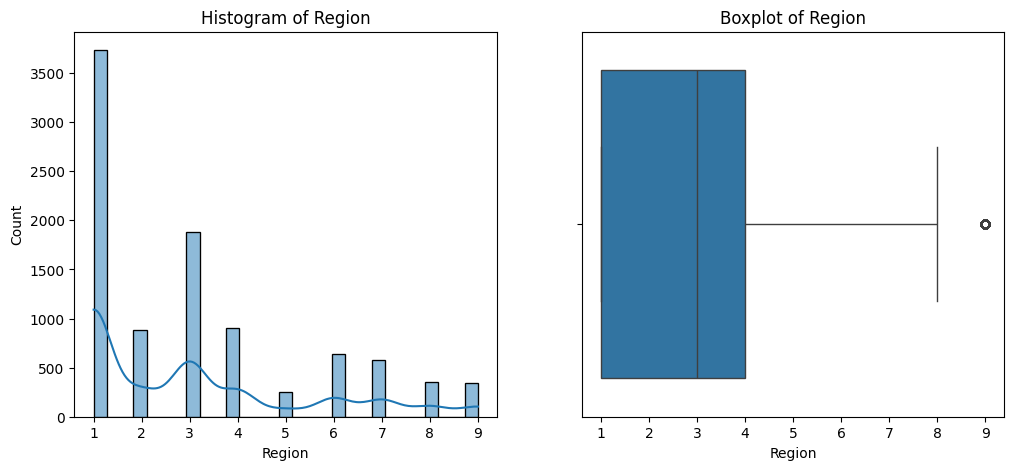

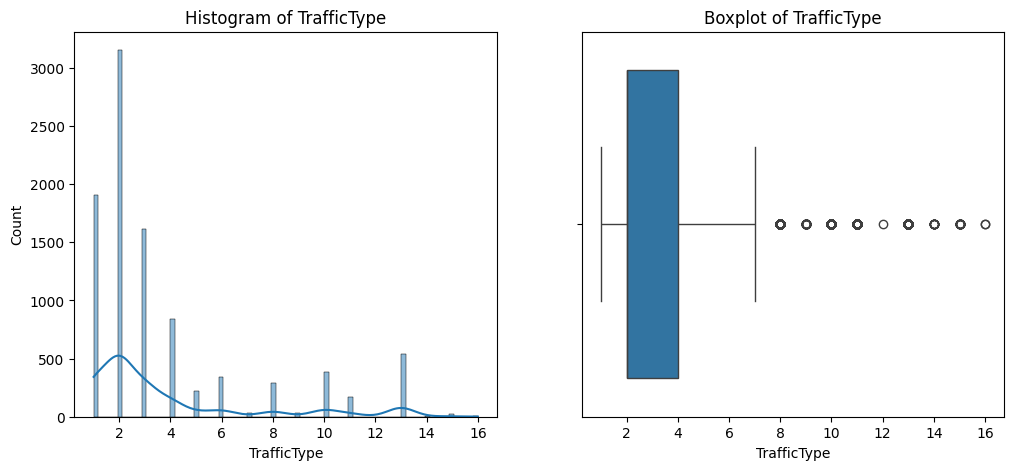

In [ ]:
for column in numeric_columns:
    plt.figure(figsize=(12, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[column], kde=True)
    plt.title(f'Histogram of {column}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')

In [ ]:
data.select_dtypes(include="number").skew()

,0
Administrative,1.436467
Administrative_Duration,2.381375
Informational,2.659650
Informational_Duration,4.716081
ProductRelated,1.985515
ProductRelated_Duration,2.005338
BounceRates,3.055984
ExitRates,1.798244
PageValues,3.140742
SpecialDay,4.006715


Even after applying the z-score mthod to remove outliers, the data is still skewed and containe outliers. To handle this, log transformation is applied to positively skewed features and square root transformation is applied to negatively skewed features.

In [ ]:
# Display initial data shape and skewness
print("Initial data shape:", data.shape)
skewness = data.select_dtypes(include='number').skew()
print("Skewness before transformation:\n", skewness)

# Function to transform skewed data
def transform_skewed_data(df, column):
    skewness_value = df[column].skew()

    if skewness_value > 0.5:  # Positive skew
        df[column] = np.log1p(df[column])  # Apply log transformation
        print(f"Applied log transformation on {column} (Skewness: {skewness_value})")
    elif skewness_value < -0.5:  # Negative skew
        df[column] = np.sqrt(df[column])  # Apply square root transformation
        print(f"Applied sqrt transformation on {column} (Skewness: {skewness_value})")
    else:
        print(f"No transformation applied on {column} (Skewness: {skewness_value})")

    return df


# Transform the numerical columns based on their skewness
for col in numeric_columns:
    data = transform_skewed_data(data, col)

# Display the skewness after transformation
skewness_after = data.select_dtypes(include='number').skew()
print("Skewness after transformation:\n", skewness_after)


Initial data shape: (9566, 18)
Skewness before transformation:
 Administrative             0.485109
Administrative_Duration    0.181044
Informational              2.046095
Informational_Duration     2.112192
ProductRelated            -0.080507
ProductRelated_Duration   -0.865223
BounceRates                2.941785
ExitRates                  1.702806
PageValues                 1.865725
SpecialDay                 3.893029
OperatingSystems           0.431166
Browser                    0.893459
Region                     0.379002
TrafficType                0.849476
dtype: float64
No transformation applied on Administrative (Skewness: 0.4851086301866408)
No transformation applied on Administrative_Duration (Skewness: 0.18104366206599767)
Applied log transformation on Informational (Skewness: 2.0460947376316394)
Applied log transformation on Informational_Duration (Skewness: 2.1121915740855712)
No transformation applied on ProductRelated (Skewness: -0.08050660880364471)
Applied sqrt transfor

After applying log transformation, some features still containg outliers and are skewed. To handle these Box-cox transformation was used. But it did not made any changes. Thus Yeo-Johnson transformation was used.

Initial data shape: (9566, 18)
Initial skewness:
 Administrative             0.485109
Administrative_Duration    0.181044
Informational              1.843287
Informational_Duration     1.894155
ProductRelated            -0.080507
ProductRelated_Duration   -2.362680
BounceRates                2.838995
ExitRates                  1.616773
PageValues                 1.675650
SpecialDay                 3.811150
OperatingSystems           0.431166
Browser                    0.402731
Region                     0.379002
TrafficType                0.453383
dtype: float64
Applying Yeo-Johnson transformation on Informational (Skewness: 1.8432865993200984)
New skewness for Informational: 1.6084130381713033
Applying Yeo-Johnson transformation on Informational_Duration (Skewness: 1.8941549330307033)
New skewness for Informational_Duration: 1.7885502514336276
Applying Yeo-Johnson transformation on BounceRates (Skewness: 2.83899519090277)
New skewness for BounceRates: 0.7304329004204827
Applying Yeo-J

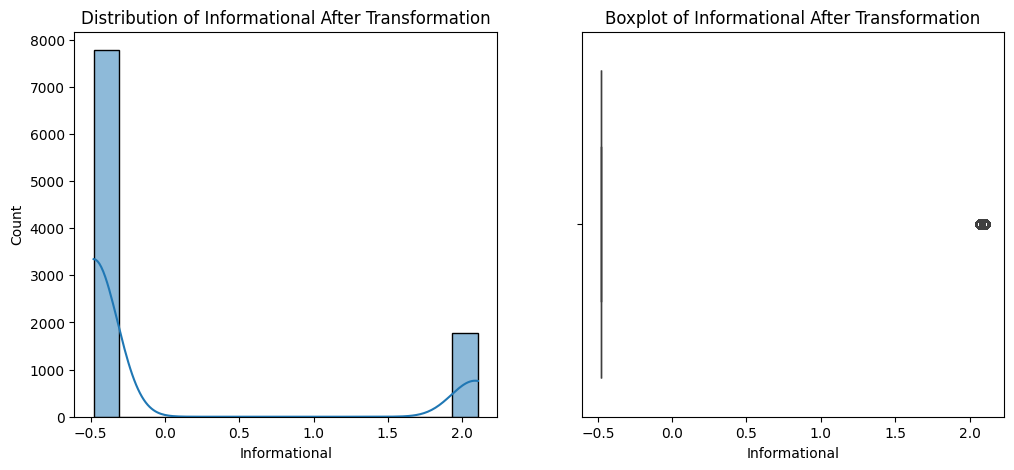

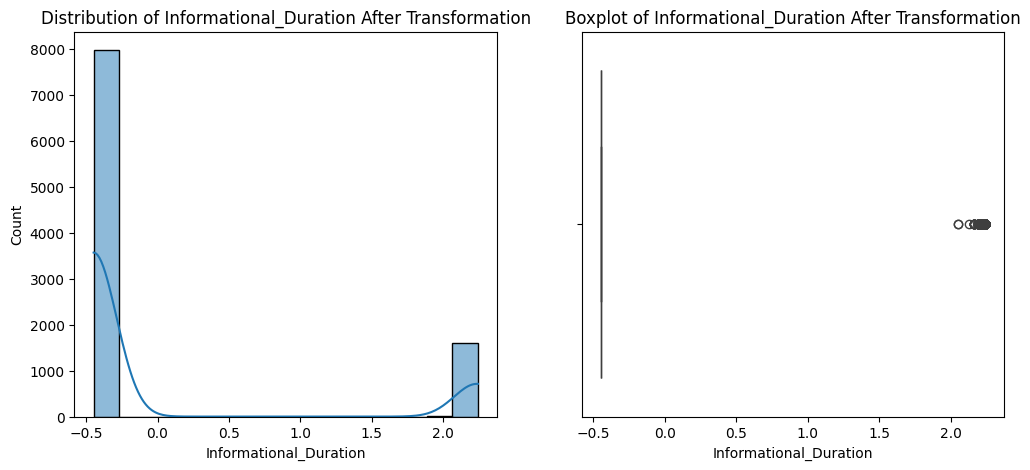

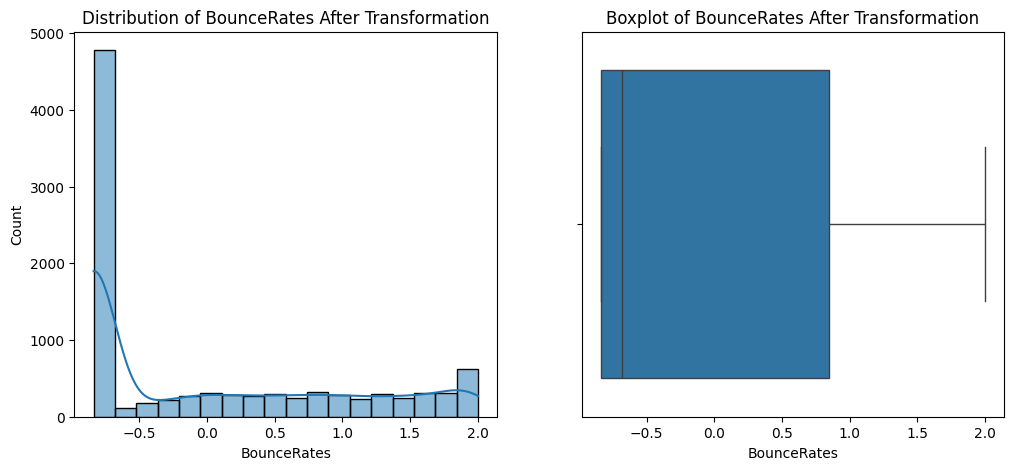

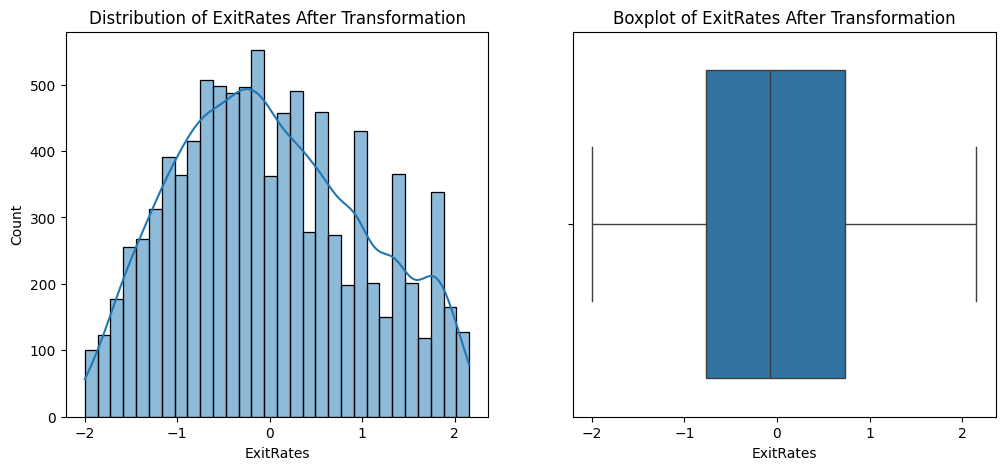

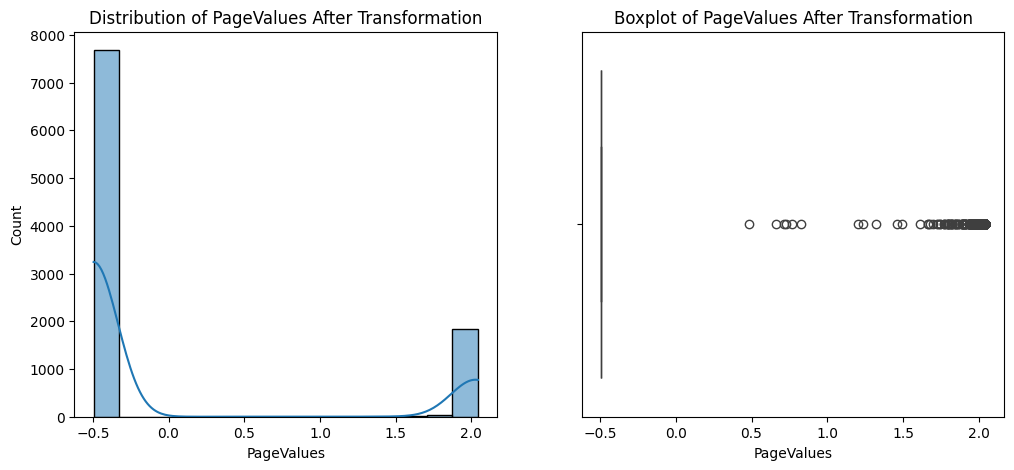

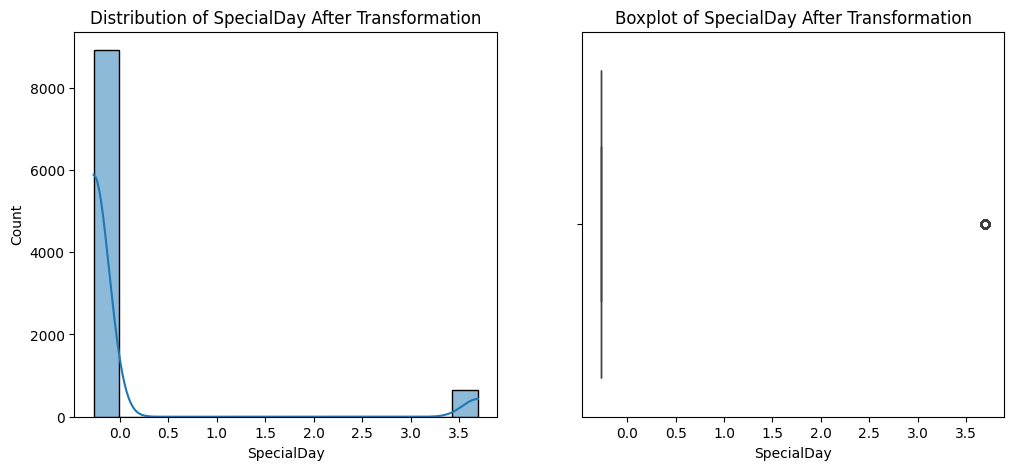

In [ ]:
# Display initial data shape and skewness
print("Initial data shape:", data.shape)
print("Initial skewness:\n", data.select_dtypes(include='number').skew())

# Function to apply transformations on positively skewed features
def apply_transformations(df, column):
    current_skewness = df[column].skew()


    # Apply Yeo-Johnson transformation if skewness is still high
    current_skewness = df[column].skew()
    if current_skewness > 1:
        print(f"Applying Yeo-Johnson transformation on {column} (Skewness: {current_skewness})")
        pt = PowerTransformer(method='yeo-johnson')
        df[column] = pt.fit_transform(df[[column]])

    # Check skewness after transformation
    new_skewness = df[column].skew()
    print(f"New skewness for {column}: {new_skewness}")

    return df

# List of numerical columns to check for transformations
columns_to_transform = ['Informational', 'Informational_Duration', 'BounceRates',
                         'ExitRates', 'PageValues', 'SpecialDay']

# Apply transformations to each specified column
for col in columns_to_transform:
    data = apply_transformations(data, col)

# Display final skewness after all transformations
print("Final skewness after transformations:\n", data.select_dtypes(include='number').skew())

# Visualize distributions before and after transformations for selected columns
for col in columns_to_transform:
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col} After Transformation')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col} After Transformation')

    plt.show()

Applying Yeo-Johnson transformation reduced the skeness and outliers considerably. Since the data only contains manageble level of skewness, proceeding to furthur actions



6.   **Exploratory Data Analysis (EDA):**



Initial data shape: (9566, 18)
       Administrative  Administrative_Duration  Informational  \
count     9566.000000              9566.000000   9.566000e+03   
mean         0.771494                 2.269625  -3.156812e-17   
std          0.812671                 2.271693   1.000052e+00   
min          0.000000                 0.000000  -4.791173e-01   
25%          0.000000                 0.000000  -4.791173e-01   
50%          0.693147                 2.397895  -4.791173e-01   
75%          1.386294                 4.454347  -4.791173e-01   
max          2.564949                 6.416787   2.105278e+00   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            9.566000e+03     9566.000000              9566.000000   
mean             3.713897e-18        2.911837                 2.467979   
std              1.000052e+00        0.956692                 0.328593   
min             -4.473208e-01        0.000000                 0.000000   
25%          

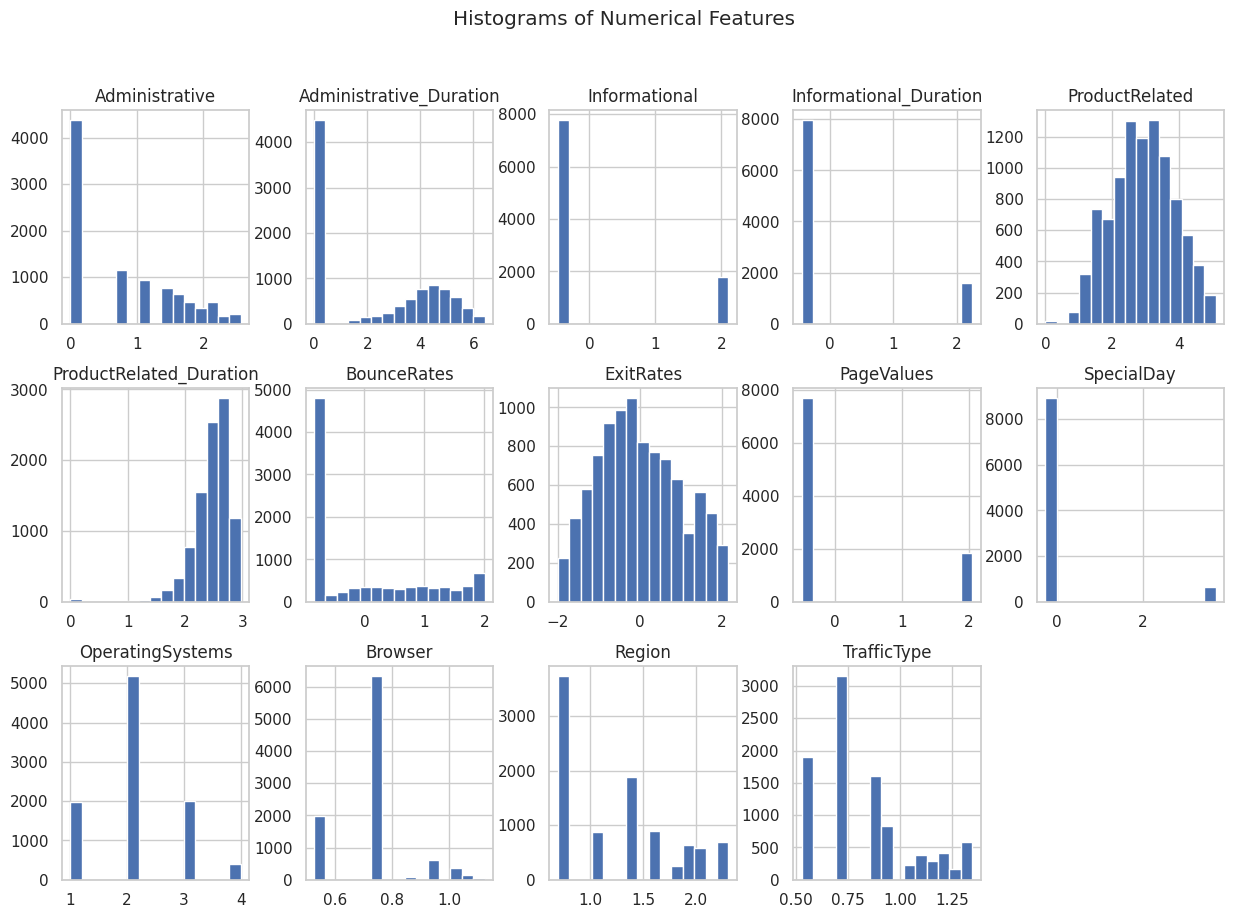

In [ ]:
# Display initial data shape and summary statistics
print("Initial data shape:", data.shape)
print(data.describe())

# Display initial skewness
print("Initial skewness:\n", data.select_dtypes(include='number').skew())

# Set up the visualisation style
sns.set(style="whitegrid")

## 1. Histograms for all numerical features
data.select_dtypes(include='number').hist(bins=15, figsize=(15, 10), layout=(3, 5))
plt.suptitle('Histograms of Numerical Features')
plt.show()

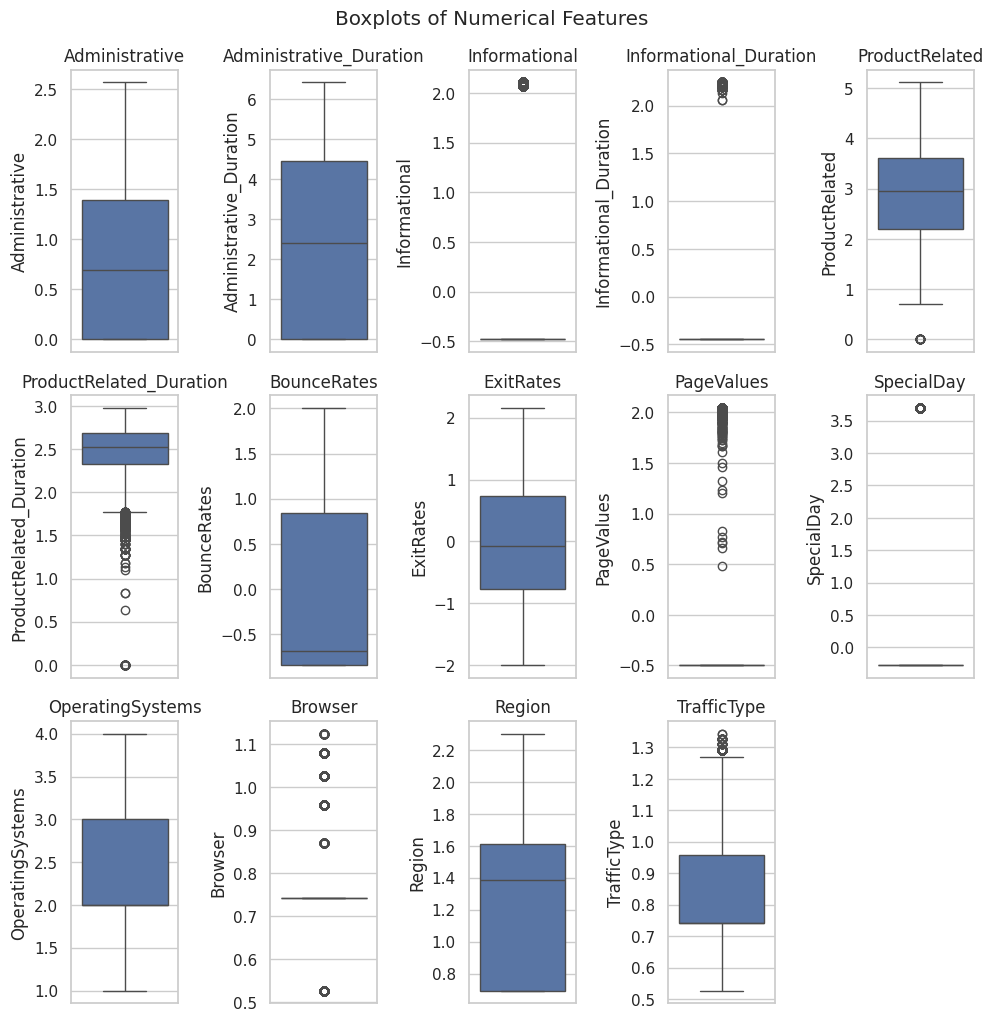

In [ ]:
## 2. Boxplots for all numerical features
plt.figure(figsize=(10, 10))
for i, column in enumerate(data.select_dtypes(include='number').columns):
    plt.subplot(3, 5, i + 1)
    sns.boxplot(y=data[column])
    plt.title(column)
plt.tight_layout()
plt.suptitle('Boxplots of Numerical Features', y=1.02)
plt.show()

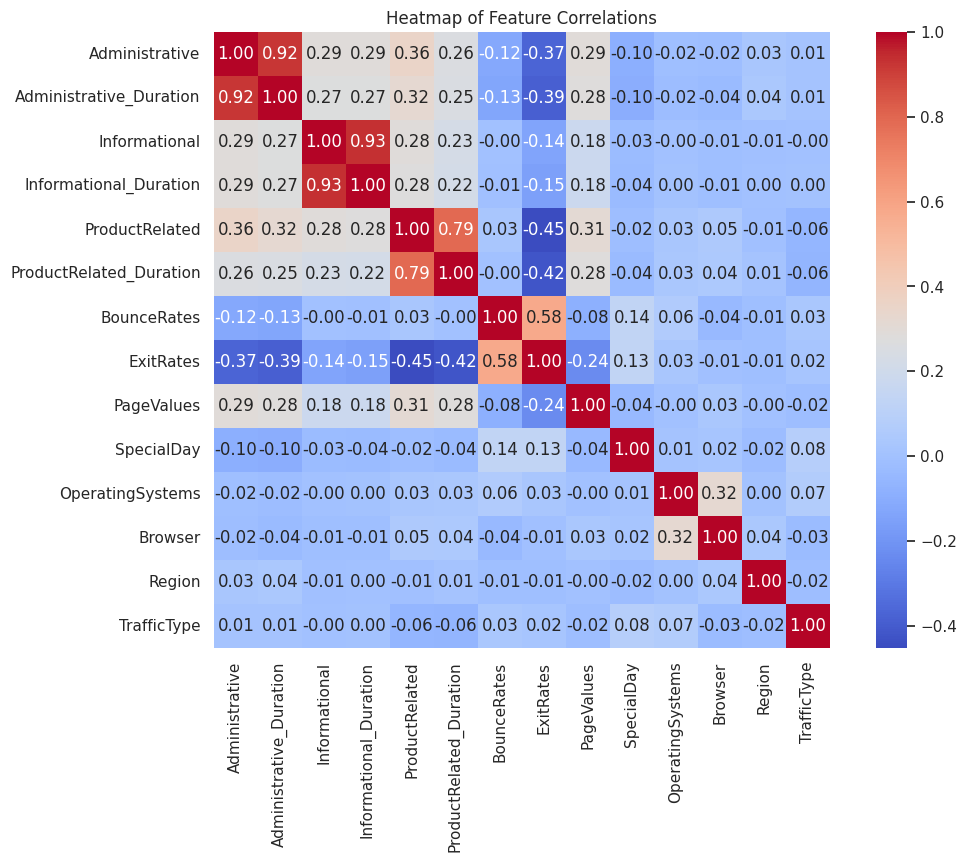

In [ ]:
## 4. Heatmap for correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = data.select_dtypes(include='number').corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Heatmap of Feature Correlations')
plt.show()

A heatmap of feature correlations can reveal relationships between numerical features. features like ProductRelated_Duration and ProductRelated shows a strong positive correlation, suggesting that longer durations spent on product-related pages are associated with higher product interactions.

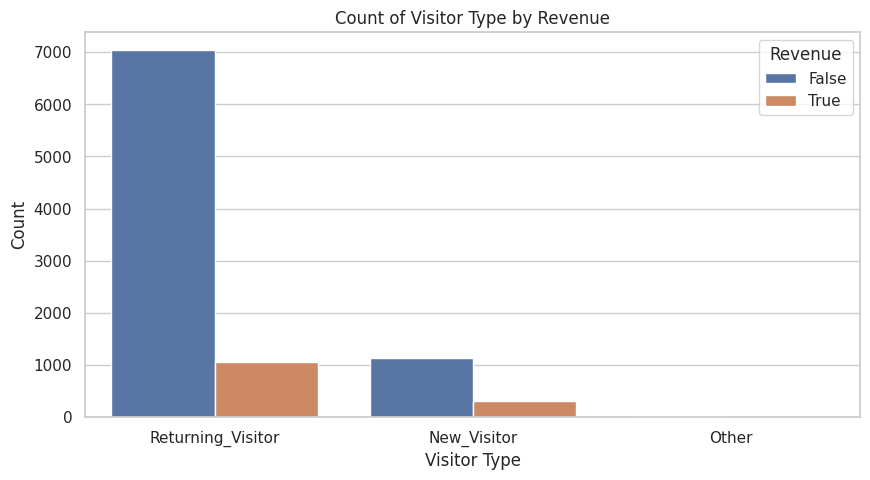

In [ ]:
## 5. Count Plot for categorical variables (e.g., VisitorType and Revenue)
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='VisitorType', hue='Revenue')
plt.title('Count of Visitor Type by Revenue')
plt.xlabel('Visitor Type')
plt.ylabel('Count')
plt.legend(title='Revenue', loc='upper right')
plt.show()

The VisitorType feature can provide insights into returning versus new visitors, which may affect conversion rates.Eventhought the count of returning visitor type is extremely high, Revenue generated is low.


7.   **Feature Engineering:**





In [ ]:
cat_data = data.select_dtypes(include="object")
bool_data = data.select_dtypes(include="bool").drop(columns='Revenue')
num_data = data.select_dtypes(include="number")
# 1. Binary Encoding for Boolean Features

# Perform binary encoding for the Weekend feature without using map
bool_data['Weekend'] = bool_data['Weekend'].replace({'TRUE': 1, 'FALSE': 0}).astype(int)


# Display encoded boolean data
print("Encoded boolean data:\n", bool_data.head())

# 2. One-Hot Encoding for Categorical Features
cat_data_encoded = pd.get_dummies(cat_data, drop_first=True,dtype=int)

# Display encoded categorical data
print("Encoded categorical data:\n", cat_data_encoded.head())

# 3. Combine Encoded DataFrames
encoded_data = pd.concat([num_data,bool_data, cat_data_encoded], axis=1)

# Display final encoded dataset shape
print("Final encoded dataset shape:", encoded_data.shape)

Encoded boolean data:
    Weekend
1        0
3        0
4        1
5        0
9        0
Encoded categorical data:
    Month_Dec  Month_Feb  Month_Jul  Month_June  Month_Mar  Month_May  \
1          0          1          0           0          0          0   
3          0          1          0           0          0          0   
4          0          1          0           0          0          0   
5          0          1          0           0          0          0   
9          0          1          0           0          0          0   

   Month_Nov  Month_Oct  Month_Sep  VisitorType_Other  \
1          0          0          0                  0   
3          0          0          0                  0   
4          0          0          0                  0   
5          0          0          0                  0   
9          0          0          0                  0   

   VisitorType_Returning_Visitor  
1                              1  
3                              1  
4  

In [ ]:
encoded_data['Revenue'] = data['Revenue'].values

In [ ]:
encoded_data['Revenue'].value_counts()

,count
Revenue,
False,8193
True,1373


The dataset shows an imbalance between the "Revenue" classes, with 8193 instances labeled as FALSE (no purchase) and 1373 instances labeled as TRUE (purchase). This suggests that the model may be biased towards predicting the majority class.Thus the data requires to be balanced. For this SMOTE is used.

In [ ]:
# Display initial data shape and class distribution
print("Initial data shape:", encoded_data.shape)
print("Class distribution of Revenue:\n", encoded_data['Revenue'].value_counts())

# Step 1: Separate the features (X) and target (y)
X = encoded_data.drop('Revenue', axis=1)  # Features excluding the target
y = encoded_data['Revenue']  # Target column

# Apply SMOTE first to balance the classes, you can change this line in accordance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)




# Step 4: Convert the resampled data back to a DataFrame if needed
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled_df = pd.DataFrame(y_resampled, columns=['Revenue'])

# Step 5: Optionally, combine the resampled features and target back into a single DataFrame
encoded_data= pd.concat([X_resampled_df, y_resampled_df], axis=1)

# Step 6: Check the new class distribution to ensure balance
print(encoded_data['Revenue'].value_counts())

Initial data shape: (9566, 27)
Class distribution of Revenue:
 Revenue
False    8193
True     1373
Name: count, dtype: int64
Revenue
False    8193
True     8193
Name: count, dtype: int64


In [ ]:
encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16386 entries, 0 to 16385
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 16386 non-null  float64
 1   Administrative_Duration        16386 non-null  float64
 2   Informational                  16386 non-null  float64
 3   Informational_Duration         16386 non-null  float64
 4   ProductRelated                 16386 non-null  float64
 5   ProductRelated_Duration        16386 non-null  float64
 6   BounceRates                    16386 non-null  float64
 7   ExitRates                      16386 non-null  float64
 8   PageValues                     16386 non-null  float64
 9   SpecialDay                     16386 non-null  float64
 10  OperatingSystems               16386 non-null  int64  
 11  Browser                        16386 non-null  float64
 12  Region                         16386 non-null 


8.   **Feature Selection**



In [ ]:
# Assume X is your feature set and y is your target variable
x = encoded_data.drop('Revenue', axis=1)  # Features excluding the target
y = encoded_data['Revenue']  # Target column
# Create a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(x, y)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': x.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

                          Feature  Importance
8                      PageValues    0.358060
7                       ExitRates    0.076052
5         ProductRelated_Duration    0.074176
13                    TrafficType    0.063732
4                  ProductRelated    0.063304
0                  Administrative    0.048548
12                         Region    0.042356
1         Administrative_Duration    0.042062
6                     BounceRates    0.041880
11                        Browser    0.031978
21                      Month_Nov    0.022711
2                   Informational    0.019812
25  VisitorType_Returning_Visitor    0.019643
10               OperatingSystems    0.017876
20                      Month_May    0.016923
3          Informational_Duration    0.015549
19                      Month_Mar    0.011764
15                      Month_Dec    0.009546
14                        Weekend    0.009397
22                      Month_Oct    0.003894
23                      Month_Sep 

From the Random Forest model, features such as PageValues (0.350886) and ExitRates (0.078125) are identified as the most important predictors for whether a purchase is made. This indicates that higher page values significantly influence purchasing decisions.

In [ ]:
# Set a threshold (example: 0.01)
threshold = 0.018

# Select features with importance above the threshold
selected_features = feature_importance_df[feature_importance_df['Importance'] > threshold]

print("Selected Features:")
print(selected_features)

# If you want to use the selected features for your dataset X
X_selected = x[selected_features['Feature']]

Selected Features:
                          Feature  Importance
8                      PageValues    0.358060
7                       ExitRates    0.076052
5         ProductRelated_Duration    0.074176
13                    TrafficType    0.063732
4                  ProductRelated    0.063304
0                  Administrative    0.048548
12                         Region    0.042356
1         Administrative_Duration    0.042062
6                     BounceRates    0.041880
11                        Browser    0.031978
21                      Month_Nov    0.022711
2                   Informational    0.019812
25  VisitorType_Returning_Visitor    0.019643




9.  **Split Data into Training and Testing Sets:**



In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X_selected,y,test_size=0.2,random_state=42)

In [ ]:
x_train.shape

(13108, 13)

In [ ]:
x_test.shape

(3278, 13)

In [ ]:
y_train.shape

(13108,)

In [ ]:
y_test.shape

(3278,)

**10. Feature Scaling**

In [ ]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

**11. Build the ML Model**

In [ ]:
# Define models
models = {
    'Logistic Regression' : LogisticRegression(),
    'Support Vector Classifier' : SVC(),
    'Decision Tree Classifier' : DecisionTreeClassifier(),
    'Random Forest Classifier' : RandomForestClassifier(),
    'Gradient Boosting Classifier' : GradientBoostingClassifier(),
    'Gaussian Naive Bayes' : GaussianNB(),
    'K-Nearest Neighbors' : KNeighborsClassifier()
}


# Store accuracies
train_accuracies = []
test_accuracies = []

# Training models
for model_name, model in models.items():

  # fit the model on training data
  model.fit(x_train_scaled,y_train)
  train_accuracy = model.score(x_train_scaled, y_train)
  train_accuracies.append(train_accuracy)

**12. Model Evaluation**

Model: Logistic Regression
Accuracy: 0.8312995729103112
Classification Report:
              precision    recall  f1-score   support

       False       0.82      0.86      0.84      1657
        True       0.85      0.80      0.82      1621

    accuracy                           0.83      3278
   macro avg       0.83      0.83      0.83      3278
weighted avg       0.83      0.83      0.83      3278



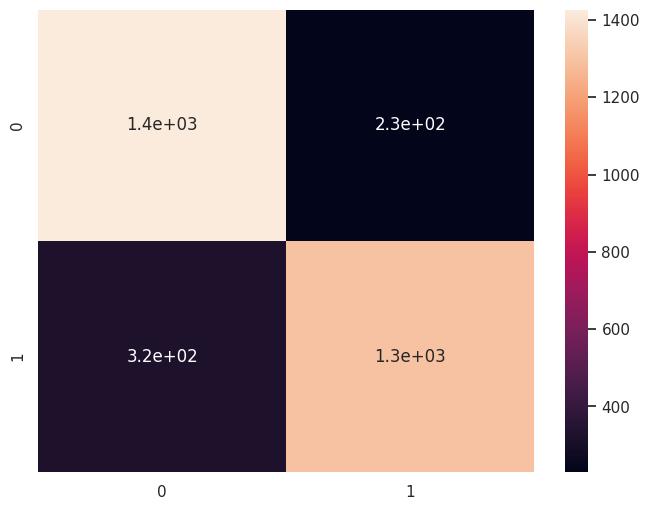

Model: Support Vector Classifier
Accuracy: 0.8697376449054302
Classification Report:
              precision    recall  f1-score   support

       False       0.88      0.85      0.87      1657
        True       0.86      0.89      0.87      1621

    accuracy                           0.87      3278
   macro avg       0.87      0.87      0.87      3278
weighted avg       0.87      0.87      0.87      3278



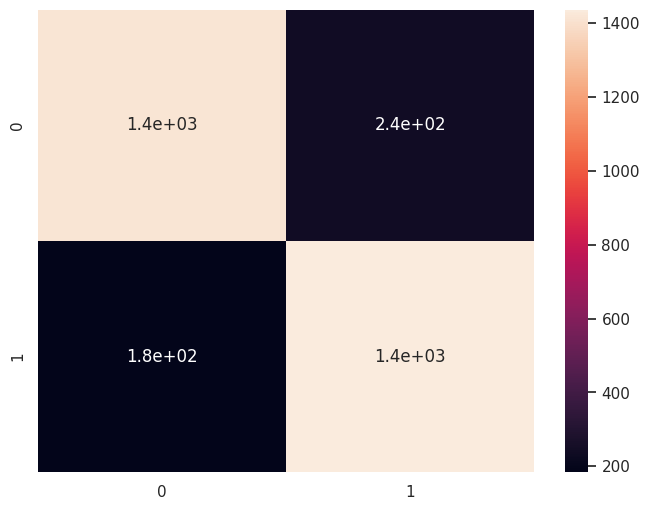

Model: Decision Tree Classifier
Accuracy: 0.7498474679682733
Classification Report:
              precision    recall  f1-score   support

       False       0.92      0.55      0.69      1657
        True       0.68      0.95      0.79      1621

    accuracy                           0.75      3278
   macro avg       0.80      0.75      0.74      3278
weighted avg       0.80      0.75      0.74      3278



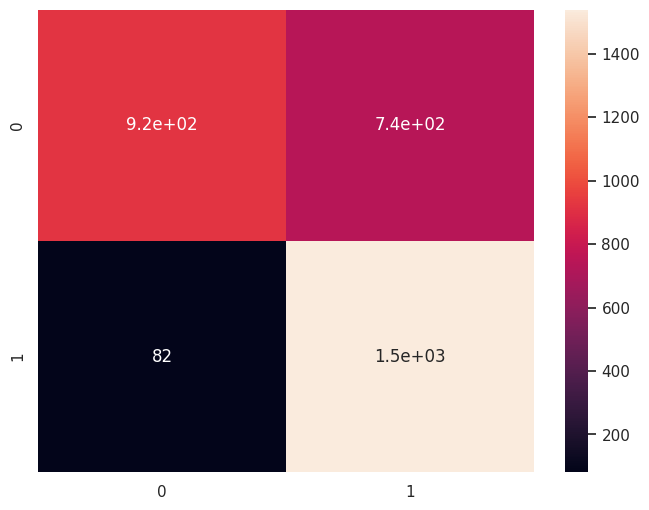

Model: Random Forest Classifier
Accuracy: 0.8764490543014033
Classification Report:
              precision    recall  f1-score   support

       False       0.97      0.78      0.86      1657
        True       0.81      0.98      0.89      1621

    accuracy                           0.88      3278
   macro avg       0.89      0.88      0.88      3278
weighted avg       0.89      0.88      0.88      3278



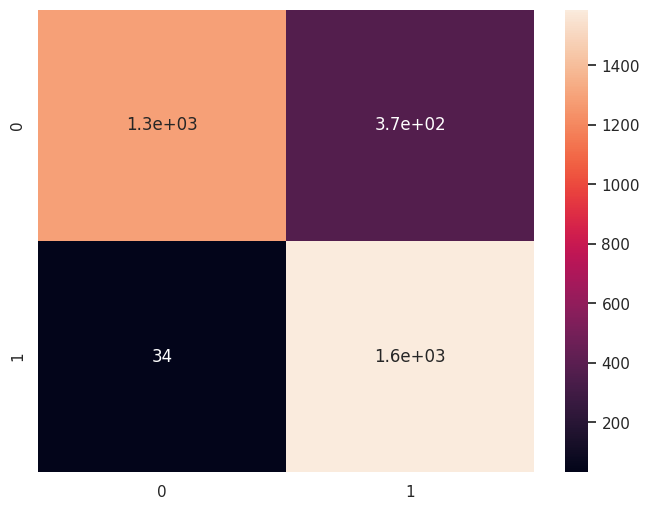

Model: Gradient Boosting Classifier
Accuracy: 0.5909090909090909
Classification Report:
              precision    recall  f1-score   support

       False       0.99      0.19      0.32      1657
        True       0.55      1.00      0.71      1621

    accuracy                           0.59      3278
   macro avg       0.77      0.60      0.51      3278
weighted avg       0.77      0.59      0.51      3278



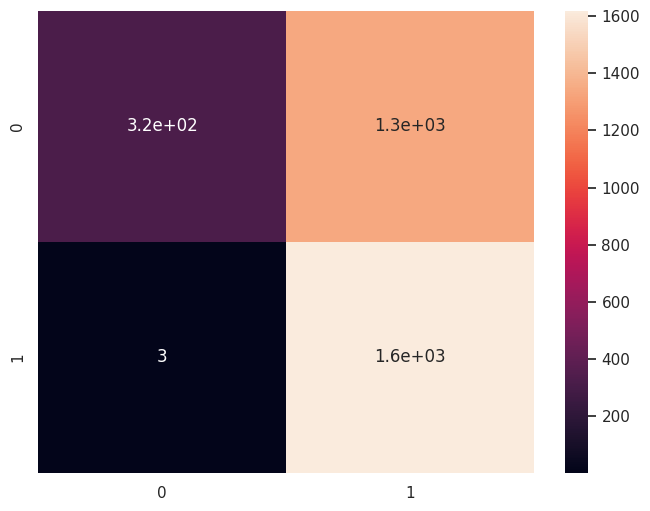

Model: Gaussian Naive Bayes
Accuracy: 0.7971323978035387
Classification Report:
              precision    recall  f1-score   support

       False       0.82      0.77      0.79      1657
        True       0.78      0.83      0.80      1621

    accuracy                           0.80      3278
   macro avg       0.80      0.80      0.80      3278
weighted avg       0.80      0.80      0.80      3278



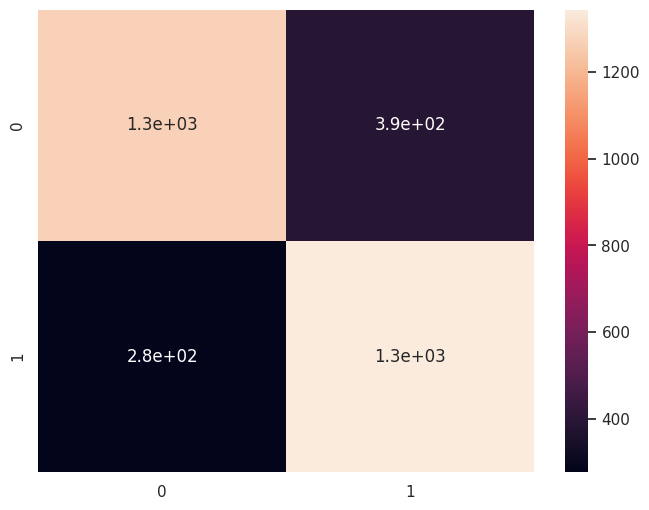

Model: K-Nearest Neighbors
Accuracy: 0.8880414887126297
Classification Report:
              precision    recall  f1-score   support

       False       0.95      0.82      0.88      1657
        True       0.84      0.96      0.89      1621

    accuracy                           0.89      3278
   macro avg       0.89      0.89      0.89      3278
weighted avg       0.90      0.89      0.89      3278



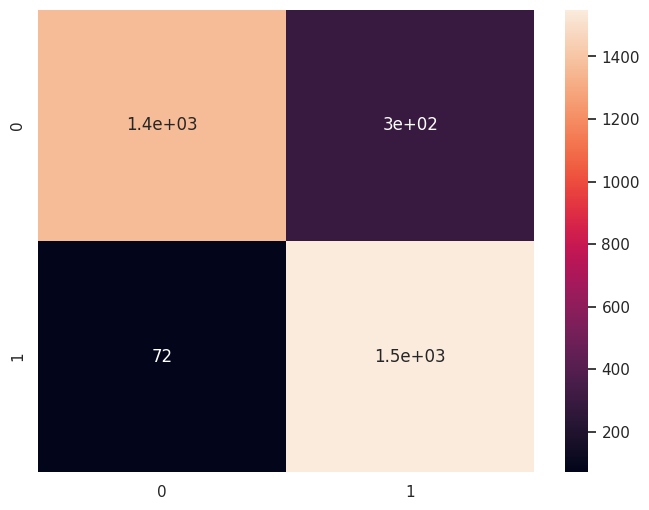

In [ ]:
for model_name, model in models.items():
  # predict on test data
  y_pred = model.predict(x_test_scaled)
  test_accuracy = model.score(x_test_scaled, y_test)
  test_accuracies.append(test_accuracy)

  print(f"Model: {model_name}")
  print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
  print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
  con = confusion_matrix(y_test, y_pred)
  plt.figure(figsize=(8, 6))
  sns.heatmap(con,annot = True)
  plt.show()

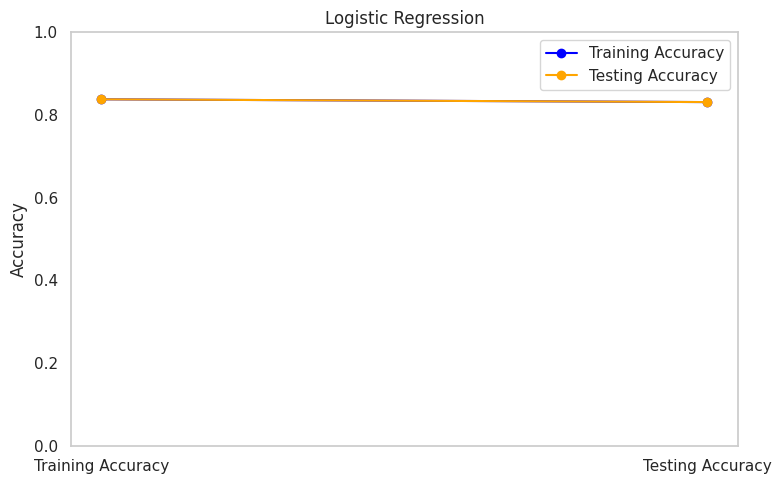

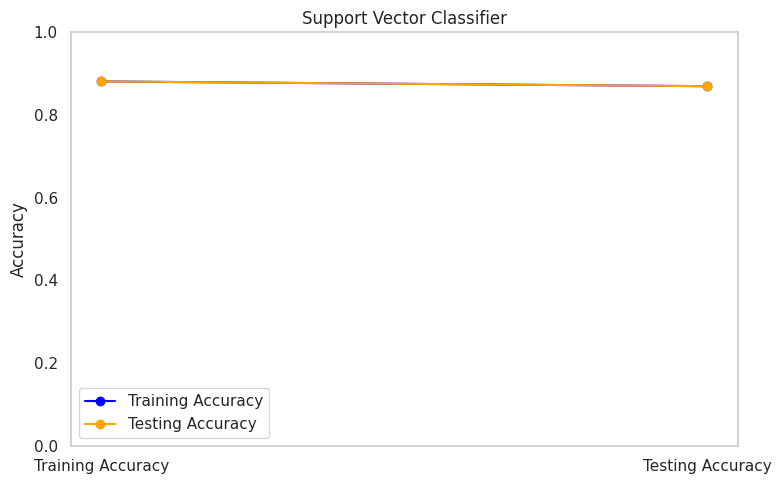

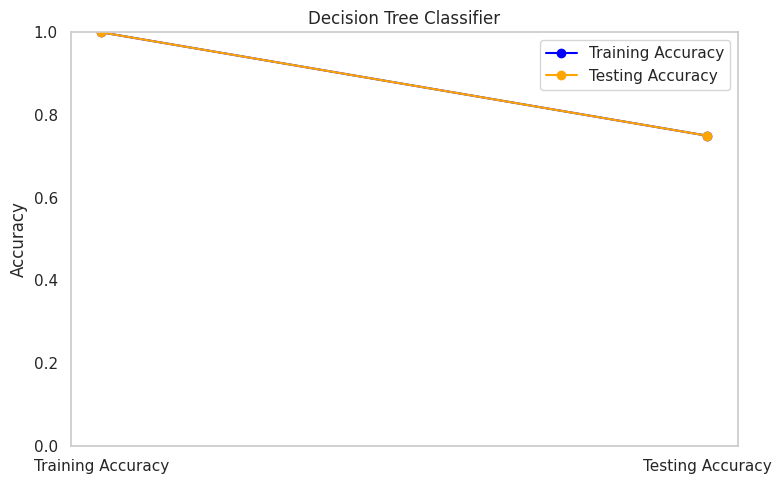

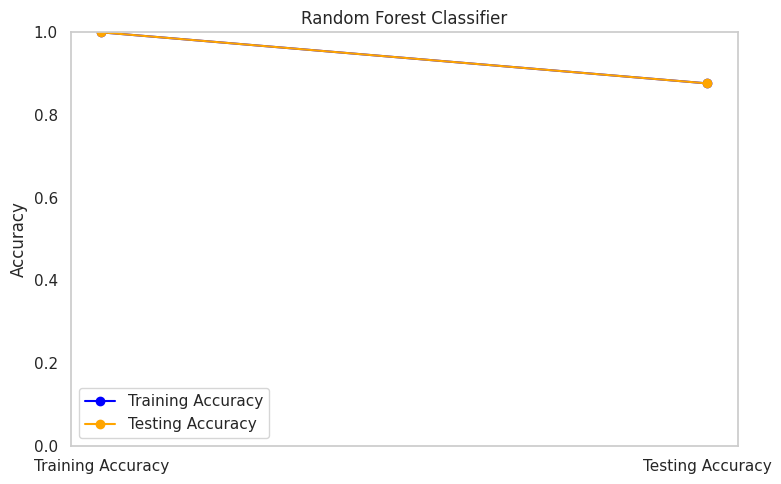

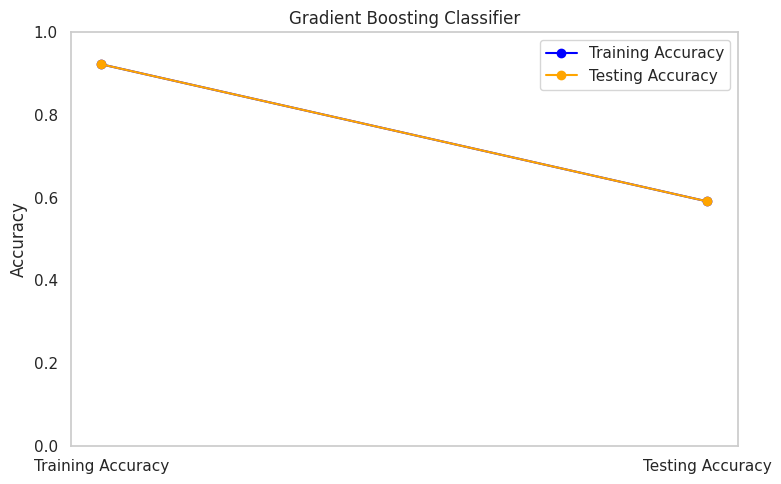

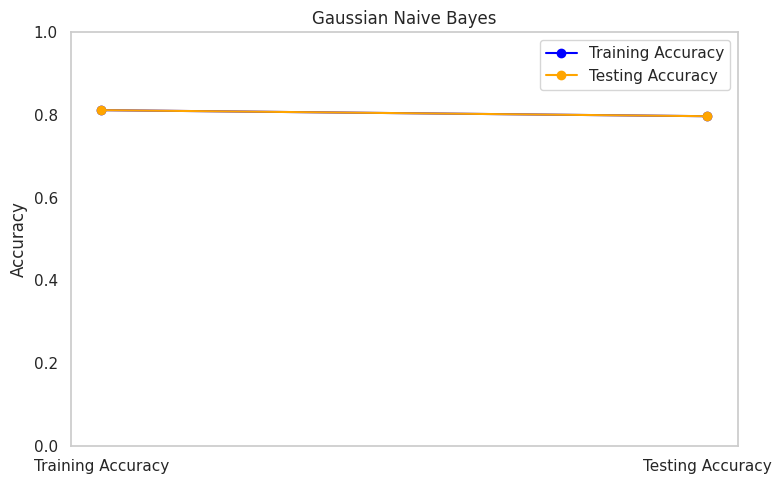

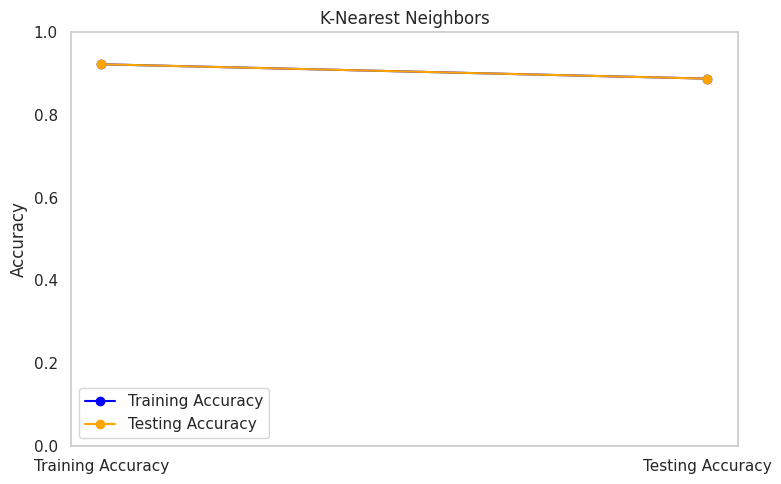

In [ ]:
# Create a DataFrame for visualization
accuracy_df = pd.DataFrame({
    'Model': list(models.keys()),
    'Training Accuracy': train_accuracies,
    'Testing Accuracy': test_accuracies
})

# Create individual plots for each model's training and testing accuracy
for i, model_name in enumerate(models.keys()):
    plt.figure(figsize=(8, 5))

    # Plotting training accuracy in blue and testing accuracy in orange
    plt.plot(['Training Accuracy', 'Testing Accuracy'],
             [train_accuracies[i], test_accuracies[i]],
             marker='o', color='blue', label='Training Accuracy')

    # Adding a second line for testing accuracy
    plt.plot(['Training Accuracy', 'Testing Accuracy'],
             [train_accuracies[i], test_accuracies[i]],
             marker='o', color='orange', label='Testing Accuracy')

    # Adding labels and title for each plot
    plt.title(model_name)
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)  # Set the y-axis limits to show accuracy percentage clearly
    plt.grid()
    plt.legend()

    # Show plot for each model
    plt.tight_layout()
    plt.show()

**Insights and Observations**


*   The models exhibit varying performance levels, with the Random Forest Classifier leading with an accuracy of approximately 87%.

*   The Support Vector Classifier also performs well with an accuracy of 87%, showing balanced precision and recall.

*   Logistic Regression provides a solid baseline at 83% accuracy but may not capture complex patterns as effectively as tree-based models.

*   The Decision Tree Classifier has a notable drop in recall for the positive class (True), indicating it may struggle to identify positive instances.
*   The Gradient Boosting Classifier shows poor performance with an accuracy of only 59%, suggesting potential issues with overfitting or misconfiguration.


*   Gaussian and Bernoulli Naive Bayes models perform reasonably well but are outperformed by more complex models.


*  K-Nearest Neighbors shows strong performance with an accuracy of approximately 89%, indicating effectiveness in classification based on proximity.






**13. Hyperparameter Tuning**

In [ ]:
# Add this import statement at the beginning of your code with other imports
from sklearn.model_selection import GridSearchCV

# Initialize a variable to track the best accuracy (e.g., before the hyperparameter tuning loop)
best_accuracy = 0

In [ ]:
# Define hyperparameter grids for each model
param_grids = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10],
        'solver': ['liblinear', 'lbfgs']
    },
    'Support Vector Classifier': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    },
    'Decision Tree Classifier': {
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    'Random Forest Classifier': {
        'n_estimators': [50, 100],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5]
    },
    'Gradient Boosting Classifier': {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5]
    },
    'Gaussian Naive Bayes': {},
        'K-Nearest Neighbors': {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance']
    }
}

# Train and tune each model using Grid Search
for model_name in param_grids.keys():
    if model_name == 'Gaussian Naive Bayes':
        model = GaussianNB()
    elif model_name == 'Support Vector Classifier':
        model = SVC()
    elif model_name == 'Decision Tree Classifier':
        model = DecisionTreeClassifier()
    elif model_name == 'Random Forest Classifier':
        model = RandomForestClassifier()
    elif model_name == 'Gradient Boosting Classifier':
        model = GradientBoostingClassifier()
    elif model_name == 'K-Nearest Neighbors':
        model = KNeighborsClassifier()
    elif model_name == 'Logistic Regression':
        model = LogisticRegression()
    else:
        # Initialize the appropriate classifier based on the name
        model_class = eval(model_name.replace(" ", ""))
        model = model_class()

    # Set up GridSearchCV with cross-validation
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5)

    # Fit the model on training data
    grid_search.fit(x_train_scaled, y_train)

    # Predict on test data using the best estimator
    y_pred = grid_search.best_estimator_.predict(x_test_scaled)

    # Calculate accuracy on test data
    test_accuracy = grid_search.score(x_test_scaled, y_test)

    # Print results
    print(f"Model: {model_name}")
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

    # Check if this is the best model so far
    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        best_model = grid_search.best_estimator_

Model: Logistic Regression
Best Parameters: {'C': 1, 'solver': 'liblinear'}
Classification Report:
              precision    recall  f1-score   support

       False       0.82      0.86      0.84      1657
        True       0.85      0.80      0.82      1621

    accuracy                           0.83      3278
   macro avg       0.83      0.83      0.83      3278
weighted avg       0.83      0.83      0.83      3278

Model: Support Vector Classifier
Best Parameters: {'C': 10, 'kernel': 'rbf'}
Classification Report:
              precision    recall  f1-score   support

       False       0.93      0.86      0.89      1657
        True       0.86      0.93      0.90      1621

    accuracy                           0.89      3278
   macro avg       0.89      0.89      0.89      3278
weighted avg       0.90      0.89      0.89      3278

Model: Decision Tree Classifier
Best Parameters: {'max_depth': None, 'min_samples_split': 2}
Classification Report:
              precision    reca

## Comparison of Model Performance Before and After Hyperparameter Tuning
### 1. Logistic Regression



*   **Before Tuning**:
  *  **Accuracy**: 83.28%


*   **After Tuning**:
  *   **Best Parameters**: {'C': 1, 'solver': 'liblinear'}
  *   **Accuracy**: 83.28%


*   **Observation**: No change in accuracy;

###2. Support Vector Classifier


*   **Before Tuning**:
##  *   **Accuracy**: 87.86%


*   **After Tuning**:
  *   **Best Parameters**: {'C': 10, 'kernel': 'rbf'}
  *   **Accuracy**:89%


*   **Observation**: Slight increase in accuracy after tuning.

### 3. Decision Tree Classifier


*  **Before Tuning**:
  *   **Accuracy**: 75%


*   **After Tuning**:
  *   **Best Parameters**: {'max_depth': 20, 'min_samples_split': 2}
  *   **Accuracy**: 76%


*   **Observation**: Slight increase in accuracy after tuning.

### 4. Random Forest Classifier


*   **Before Tuning**:
  *   **Accuracy**: 87%


*   **After Tuning**:
  *   **Best Parameters**: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
  *   **Accuracy**: 87%
  *   **Observation**: No change in accuracy;

###  5. Gradient Boosting Classifier


*   **Before Tuning**:
  *   **Accuracy**: 59%


*   **After Tuning**:
  *   **Best Parameters**: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
  *   **Accuracy**: 54%
*   **Observation**: Further decline in performance metrics after tuning.

### 6. Gaussian Naive Bayes


*   **Before Tuning**:
  *   **Accuracy**: 80%


*   **After Tuning**:
  *   No hyperparameters to tune
    *   **Accuracy**: 80%
      *   **Observation**: No change in accuracy;

###      7. K-Nearest Neighbors


*   **Before Tuning**:
  *   Accuracy: 89%


*   **After Tuning**:
  *   Best Parameters {'n_neighbors':3, 'weights':'distance'}
  *   Accuracy improved to 90%.

##  Summary of Changes
*   The ***Gradient Boosting Classifier*** did not improve with tuning and remains the least effective model.

















































# **14. Save the Model**:

In [ ]:
# Save the best model to a file
model_filename = 'best_model.joblib'
joblib.dump(best_model, model_filename)

print(f'Best model saved to {model_filename} with accuracy: {best_accuracy:.4f}')
print(f'Best model saved is {model_name}')

Best model saved to best_model.joblib with accuracy: 0.9045
Best model saved is K-Nearest Neighbors


## **15. Test with Unseen Data**:

In [10]:
import pandas as pd

# Load unseen data from CSV file
unseen_data = pd.read_csv('/content/Untitled spreadsheet - online_shoppers_intention.csv')

# Display the first few rows of the dataset
print("Initial Unseen Data:")
print(unseen_data.head())

Initial Unseen Data:
   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0

In [11]:
unseen_data = unseen_data.drop(columns=['Revenue'])

In [12]:
# 1. Check for missing values
print("\nMissing Values:")
print(unseen_data.isnull().sum())


Missing Values:
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
dtype: int64


In [28]:
unseen_data.duplicated().sum()

0

In [29]:
num_data = unseen_data.select_dtypes(include='number')
numeric_columns=list(num_data)
numeric_columns

['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues',
 'SpecialDay',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType']

In [30]:
# 1. Check for skewness
skewness = unseen_data.select_dtypes(include='number').skew()
print("\nSkewness of each feature:")
print(skewness)


Skewness of each feature:
Administrative             0.520713
Administrative_Duration    0.219231
Informational              2.187005
Informational_Duration     2.477337
ProductRelated            -0.193809
ProductRelated_Duration   -0.930029
BounceRates                0.697597
ExitRates                  0.171973
PageValues                 1.999979
SpecialDay                 7.621162
OperatingSystems           0.439294
Browser                    0.672359
Region                     0.354062
TrafficType                0.851631
dtype: float64


In [31]:
# Remove outliers using Z-score method
unseen_data = unseen_data[(np.abs(stats.zscore(unseen_data.select_dtypes(include=['float64', 'int64']))) < 3).all(axis=1)]

In [32]:
# Function to transform skewed data
def transform_skewed_data(df, column):
    skewness_value = df[column].skew()

    if skewness_value > 0.5:  # Positive skew
        df[column] = np.log1p(df[column])  # Apply log transformation
        print(f"Applied log transformation on {column} (Skewness: {skewness_value})")
    elif skewness_value < -0.5:  # Negative skew
        df[column] = np.sqrt(df[column])  # Apply square root transformation
        print(f"Applied sqrt transformation on {column} (Skewness: {skewness_value})")
    else:
        print(f"No transformation applied on {column} (Skewness: {skewness_value})")

    return df


# Transform the numerical columns based on their skewness
for col in numeric_columns:
    unseen_data = transform_skewed_data(unseen_data, col)

Applied log transformation on Administrative (Skewness: 0.5157144207690323)
No transformation applied on Administrative_Duration (Skewness: 0.2160716631632404)
Applied log transformation on Informational (Skewness: 2.17915861266894)
Applied log transformation on Informational_Duration (Skewness: 2.4711416288832115)
No transformation applied on ProductRelated (Skewness: -0.13133382341342711)
Applied sqrt transformation on ProductRelated_Duration (Skewness: -0.6060991779713174)
Applied log transformation on BounceRates (Skewness: 0.6951924234718123)
No transformation applied on ExitRates (Skewness: 0.18073588351402056)
Applied log transformation on PageValues (Skewness: 1.9872702799188708)
No transformation applied on SpecialDay (Skewness: 0.0)
No transformation applied on OperatingSystems (Skewness: 0.43748410773685303)
Applied log transformation on Browser (Skewness: 0.6697848190092945)
No transformation applied on Region (Skewness: 0.3522295462275083)
Applied log transformation on Tra

<ipython-input-32-47fd161bc38b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = np.log1p(df[column])  # Apply log transformation
<ipython-input-32-47fd161bc38b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = np.sqrt(df[column])  # Apply square root transformation


In [34]:
# Function to apply transformations on positively skewed features
def apply_transformations(df, column):
    current_skewness = df[column].skew()


    # Apply Yeo-Johnson transformation if skewness is still high
    current_skewness = df[column].skew()
    if current_skewness > 1:
        print(f"Applying Yeo-Johnson transformation on {column} (Skewness: {current_skewness})")
        pt = PowerTransformer(method='yeo-johnson')
        df[column] = pt.fit_transform(df[[column]])

    # Check skewness after transformation
    new_skewness = df[column].skew()
    print(f"New skewness for {column}: {new_skewness}")

    return df

# List of numerical columns to check for transformations
columns_to_transform = ['Informational', 'Informational_Duration', 'BounceRates',
                         'ExitRates', 'PageValues', 'SpecialDay']

# Apply transformations to each specified column
for col in columns_to_transform:
    unseen_data = apply_transformations(unseen_data, col)

Applying Yeo-Johnson transformation on Informational (Skewness: 2.179158612668939)
New skewness for Informational: 2.179158612668939
Applying Yeo-Johnson transformation on Informational_Duration (Skewness: 2.4711416288832115)
New skewness for Informational_Duration: 2.4711416288832107
New skewness for BounceRates: 0.32909971822631645
New skewness for ExitRates: 0.18073588351402056
Applying Yeo-Johnson transformation on PageValues (Skewness: 1.98727027969096)
New skewness for PageValues: 1.987270279690953
New skewness for SpecialDay: 0.0


<ipython-input-34-daffc80cbaa1>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = pt.fit_transform(df[[column]])
<ipython-input-34-daffc80cbaa1>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = pt.fit_transform(df[[column]])
<ipython-input-34-daffc80cbaa1>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [37]:
# Feature Engineering:
cat_data = unseen_data.select_dtypes(include="object")
bool_data = unseen_data.select_dtypes(include="bool")
num_data = unseen_data.select_dtypes(include="number")
# 1. Binary Encoding for Boolean Features

# Perform binary encoding for the Weekend feature without using map
bool_data['Weekend'] = bool_data['Weekend'].replace({'TRUE': 1, 'FALSE': 0}).astype(int)


# Display encoded boolean data
print("Encoded boolean data:\n", bool_data.head())

# 2. One-Hot Encoding for Categorical Features
cat_data_encoded = pd.get_dummies(cat_data, dtype=int)

# Display encoded categorical data
print("Encoded categorical data:\n", cat_data_encoded.head())

# 3. Combine Encoded DataFrames
encoded_data = pd.concat([num_data,bool_data, cat_data_encoded], axis=1)

# Display final encoded dataset shape
print("Final encoded dataset shape:", encoded_data.shape)


Encoded boolean data:
     Weekend
1         0
4         1
5         0
10        0
12        0
Encoded categorical data:
     Month_Aug  Month_Dec  Month_Feb  Month_Jul  Month_June  Month_Mar  \
1           0          0          1          0           0          0   
4           0          0          1          0           0          0   
5           0          0          1          0           0          0   
10          0          0          1          0           0          0   
12          0          0          1          0           0          0   

    Month_May  Month_Nov  Month_Oct  Month_Sep  VisitorType_New_Visitor  \
1           0          0          0          0                        0   
4           0          0          0          0                        0   
5           0          0          0          0                        0   
10          0          0          0          0                        0   
12          0          0          0          0                  

In [38]:
encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7147 entries, 1 to 12329
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 7147 non-null   float64
 1   Administrative_Duration        7147 non-null   float64
 2   Informational                  7147 non-null   float64
 3   Informational_Duration         7147 non-null   float64
 4   ProductRelated                 7147 non-null   float64
 5   ProductRelated_Duration        7147 non-null   float64
 6   BounceRates                    7147 non-null   float64
 7   ExitRates                      7147 non-null   float64
 8   PageValues                     7147 non-null   float64
 9   SpecialDay                     7147 non-null   float64
 10  OperatingSystems               7147 non-null   int64  
 11  Browser                        7147 non-null   float64
 12  Region                         7147 non-null   float

In [ ]:
unseen_selected = encoded_data[selected_features['Feature']]

In [ ]:
unseen_scaled = scaler.transform(unseen_selected)